# **Analisis Customer Spending Supermarket**

## **Business Understanding**

Pada bagian ini, kita akan memahami konteks bisnis, merumuskan permasalahan yang ingin diselesaikan, dan mengenal dataset yang tersedia. **Business Context** menjelaskan latar belakang supermarket dan alasan pentingnya analisis customer untuk strategi marketing dan peningkatan penjualan. **Problem Statement** mengidentifikasi pertanyaan utama yang akan dijawab melalui analisis. **Dataset Overview** memperkenalkan data yang digunakan, termasuk struktur, variabel, dan kualitas data, serta menyiapkan modul Python yang dibutuhkan untuk membaca dan mengeksplorasi dataset sebelum memulai analisis lebih lanjut.

### **Business Context**

Di era persaingan dagang saat ini, beberapa supermarket menghadapi tantangan tentang bagaimana mempertahankan dan memahami perilaku customer agar dapat meningkatkan penjualan, loyalitas, dan efektivitas promosi. Sehingga dalam hal ini analisa mendalam terkait dengan perilaku maupun demografi customer sangat dibutuhkan.

### **Problem Statement**

Dalam project ini Supermarket ingin mengtahui **“Karakteristik Customer yang Mempengaruhi Pola Spending di Supermarket”** yang bermanfaat untuk  membantu Supermarket memahami segmen dengan spending tinggi serta merancang strategi promosi dan alokasi sumber daya yang lebih tepat sasaran.

Untuk menganalisa topik tersebut lebih dalam, analisis difokuskan pada tiga faktor utama:
1. `Family Type` > *menggambarkan aspek demografi yang berkaitan erat dengan kebutuhan dan pola konsumsi rumah tangga.*
2. `Income` > *mencerminkan kapasitas finansial customer yang berpotensi menjadi faktor penentu daya beli.*
3. `Purchase Channel` > *merepresentasikan perilaku belanja customer serta preferensi interaksi dengan supermarket.*

Ketiga faktor ini dipilih karena dianggap paling representatif dalam menjelaskan pola spending. Selain itu dengan membatasi analisis pada tiga faktor ini, penelitian menjadi lebih terfokus, relevan, dan langsung mengarah pada variabel-variabel yang paling berpengaruh terhadap spending.

### **Dataset Overview**

Pada bagian ini terdapat 2 proses yang dilakukan yaitu **Import Modules**, dimana proses ini digunakan untuk memasukkan berbagai macam library yang nantinya akan digunakan selama proses analisis data. Kemudian berikutnya yaitu **Read Dataset** untuk membaca dataset sekaligus menampilkan tabel dan juga menjelaskan struktur data nya.

#### **Import Modules**

Library/Modules yang di gunakan untuk proses analisa Supermarket Customers ini adalah:
- Pandas - Manipulasi, pembersihan, dan eksplorasi dataset
- NumPy - Perhitungan numerik terutama operasi array
- Matplotlib - Membuat visualisasi data
- Seaborn - Membuat visualisasi data
- SciPy - Perhitungan statistik dan fungsi ilmiah tambahan
- Statsmodels - Analisis statistik lebih lanjut
- Warnings - menonaktifkan tampilan warning agar output lebih bersih

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr, skew, shapiro, ttest_ind, f_oneway, kruskal
from matplotlib.ticker import MultipleLocator
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

#### **Read Dataset**

In [99]:
# Read dataset Supermarket Customers
df = pd.read_csv("Supermarket Customers.csv", sep = '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


People:
- `ID`: Customer's unique identifier
- `Year_Birth`: Customer's birth year
- `Education`: Customer's education level
- `Marital_Status`: Customer's marital status
- `Income: Customer`'s yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Dt_Customer`: Date of customer's enrollment with the company
- `Recency`: Number of days since customer's last purchase
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

Products:
- `MntWines`: Amount spent on wine in last 2 years
- `MntFruits`: Amount spent on fruits in last 2 years
- `MntMeatProducts`: Amount spent on meat in last 2 years
- `MntFishProducts`: Amount spent on fish in last 2 years
- `MntSweetProducts`: Amount spent on sweets in last 2 years
- `MntGoldProds`: Amount spent on gold in last 2 years

Promotion:
- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if the customer accepted the offer in the last campaign, 0 otherwise
 
Place:
- `NumWebPurchases`: Number of purchases made through the company’s website
- `NumCatalogPurchases`: Number of purchases made using a catalog
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to the company’s website in the last month

## **Data Preprocessing**

Pada proses data preprosessing ini beberapa langkah dilakukan diantaranya adalah:
- **Data Uderstanding:** Eksplorasi, memahami, dan mengidentifikasi struktur dataset. Selain juga memastikan bagian kolom mana saja yang harus di cleaning
- **Data Cleaning:** Setelah mengetahui dan memahami struktur data sekaligus bagian-bagian yang harus diadjust, mulai untuk melanjutkan proses data cleaning.

### **Data Understanding**

Terdapat 2 tahap dalam proses Data Understanding ini:
- **Data Exploration:** Mengeksplore dan memahami keseluruhan struktur dataset, untuk melihat anomali-anomali data apa saja yang perlu ditangani
- **Summmary:** Mencatatan keseluruhan hasil data yang sudah di eksplorasi

#### **Initial Data Analysis**

Terdapat beberapa methods yang dilakukan pada saat data exploration, diantaranya:
- Mengecek datatype masing-masing kolom apakah sudah sesuai atau tidak
- Mengecek deskripsi statistik dari tiap-tiap kolom baik numerical maupun categorical sekaligus melihat sekilas distribusi data sebelum dilanjutkan dengan analisis yang lebih mendalam
- Mengecek unique value dari kolom-kolom categorical atau kolom dengan object datatype
- Mengecek missing values
- Mengecek duplicate data

In [100]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [101]:
# Checking all the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Datatype kolom `Dt_Customer` masih berbentuk string/object dimana seharusnya adalah datetime

In [102]:
# Checking the descriptive information for both numerical and catgorical data
pd.set_option('display.max_columns', None) 
display(df.describe(),df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


- Pada kolom `Income`, terlihat adanya potensi outlier ekstrem. Nilai maksimum **(666666)** sangat jauh berbeda dibandingkan dengan **Q3 (68522)**, sehingga kemungkinan besar nilai tersebut tidak wajar dan perlu ditelusuri lebih lanjut.
- Selain itu pada kolom-kolom MntWines, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth` juga memiliki potensi outliers yang cukup ekstrim melihat nilai max nya jauh dengan nilai Q3. Namun kemungkinan hal ini masih bisa mencerminkan kelompok pelanggan dengan pengeluaran yang jauh lebih besar.
- Kolom ``Z_CostContact`` dan `Z_Revenue` hanya memiliki satu nilai yang sama untuk seluruh baris. Selain itu, tidak ada penjelasan di dokumentasi dataset terkait kedua kolom ini → sehingga besar kemungkinan kolom ini tidak relevan untuk analisis dan bisa dipertimbangkan untuk dihapus.

In [103]:
# Checking unique value of all the object datatypes
display(df['Education'].unique(),df['Marital_Status'].unique(),df['Dt_Customer'].unique())

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11-05-2013', '29-10-2012', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '05-11-2013', '02-10-2013', '28-06-2014',
       '09-11-2012', '24-05-2013', '01-01-2014', '08-11-2012',
       '12-05-2014', '11-08-2012', '07-06-2014', '12-06-2013',
       '19-11-2012', '02-04-2013', '28-04-2014', '17-06-2013',
       '03-03-2014', '04-07-2013', '07-09-2012', '18-02-2013',
       '11-06-2013', '06-12-2013', '21-05-2013', '11-05-2014',
       '19-03-2014', '27-09-2013', '08-04-2013', '11-09

- Kategori pada kolom `Education` terdapat 2 kategori yang sama yaitu **2n Cyle** dan **Master**
- Kategori pada kolom `Marital_Status` terdapat beberapa kategori yang memiliki arti sama diantaranya:
    1. **Single** dan **Alone**
    2. **Together** dan **Married**
    3. **Divorced** dan **Widow** 
- Selain itu ada kategori yang mungkin tidak mewakili customer pada kolom `Marital_Status`, yaitu **YOLO** dan **Absurd**

In [104]:
# Checking the missing values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Missing Value hanya terdapat pada kolom `Income`, yaitu sebanyak **24** data

In [105]:
# Checking the duplicated data
df.duplicated().sum()

np.int64(0)

Tidak terdapat duplicated data pada dataset Supermarket Customers

#### **Summmary**

Pada tahap eksplorasi awal terhadap dataset Supermarket Customers, dilakukan analisis terhadap struktur data, statistik deskriptif, distribusi nilai unik, serta pengecekan missing value dan data duplikat. Tujuan dari tahap ini adalah untuk memahami karakteristik dasar dataset serta mengidentifikasi potensi permasalahan atau anomali sebelum dilakukan proses pembersihan/penanganan dan analisis lebih lanjut.

Berikut adalah ringkasan temuan utama:
Tipe Data
- Kolom `Dt_Customer` masih dalam format string/object, seharusnya diubah menjadi datetime.

Statistik Deskriptif
- Kolom `Income` memiliki outlier ekstrem dengan nilai maksimum 666,666, jauh di atas Q3 (68,522). Hal ini kemungkinan besar merupakan data error atau pencatatan tidak wajar.
- Beberapa kolom pembelian produk (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`) serta kolom perilaku transaksi (`NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`) juga menunjukkan adanya outlier karena gap besar antara nilai maksimum dan Q3. Namun, outlier ini mungkin masih relevan sebagai representasi kelompok pelanggan dengan pengeluaran lebih tinggi (high spender).
- Kolom Z_CostContact dan Z_Revenue hanya memiliki 1 nilai unik di seluruh baris, tanpa penjelasan di dokumentasi → besar kemungkinan tidak relevan untuk analisis.

Nilai Unik
- Kolom `Education` memiliki kategori ganda atau tidak konsisten, misalnya **“2n Cyle”** yang sama dengan kategori **"Master"**.
- Kolom `Marital_Status` terdapat kategori yang memiliki arti sama atau tumpang tindih:
    *1. Single ↔ Alone*
    *2. Together ↔ Married*
    *3. Divorced ↔ Widow*
- Ditemukan kategori yang tidak relevan seperti “YOLO” dan “Absurd” yang kemungkinan error input atau dummy data.

Missing Values
- Missing values hanya ada pada kolom `Income` sebanyak 24 data.

Duplicate Data
- Tidak ditemukan data duplikat pada dataset.

### **Data Cleaning**

Pada bagian ini akan dilakukan beberapa tahap Data Cleaning berdasarkan dari hasil eksplorasi pada saat proses Data Understanding, dimana proses-proses data cleaning nya meliputi:
- Mengecek dan menangani utliers
- Menangani missing values
- Menyesuaikan ketegori pada kolom data kategorikal
- Merubah data type yang tidak sesuai
- Menghapus Kolom yang tidak relevan
- Menambahkan kolom baru

In [106]:
df_clean = df.copy()

#### **Outliers**

[<Axes: xlabel='Income'>,
 <Axes: xlabel='MntWines'>,
 <Axes: xlabel='MntFruits'>,
 <Axes: xlabel='MntMeatProducts'>,
 <Axes: xlabel='MntFishProducts'>,
 <Axes: xlabel='MntSweetProducts'>,
 <Axes: xlabel='MntGoldProds'>,
 <Axes: xlabel='NumDealsPurchases'>,
 <Axes: xlabel='NumWebPurchases'>,
 <Axes: xlabel='NumCatalogPurchases'>,
 <Axes: xlabel='NumStorePurchases'>,
 <Axes: xlabel='NumWebVisitsMonth'>]

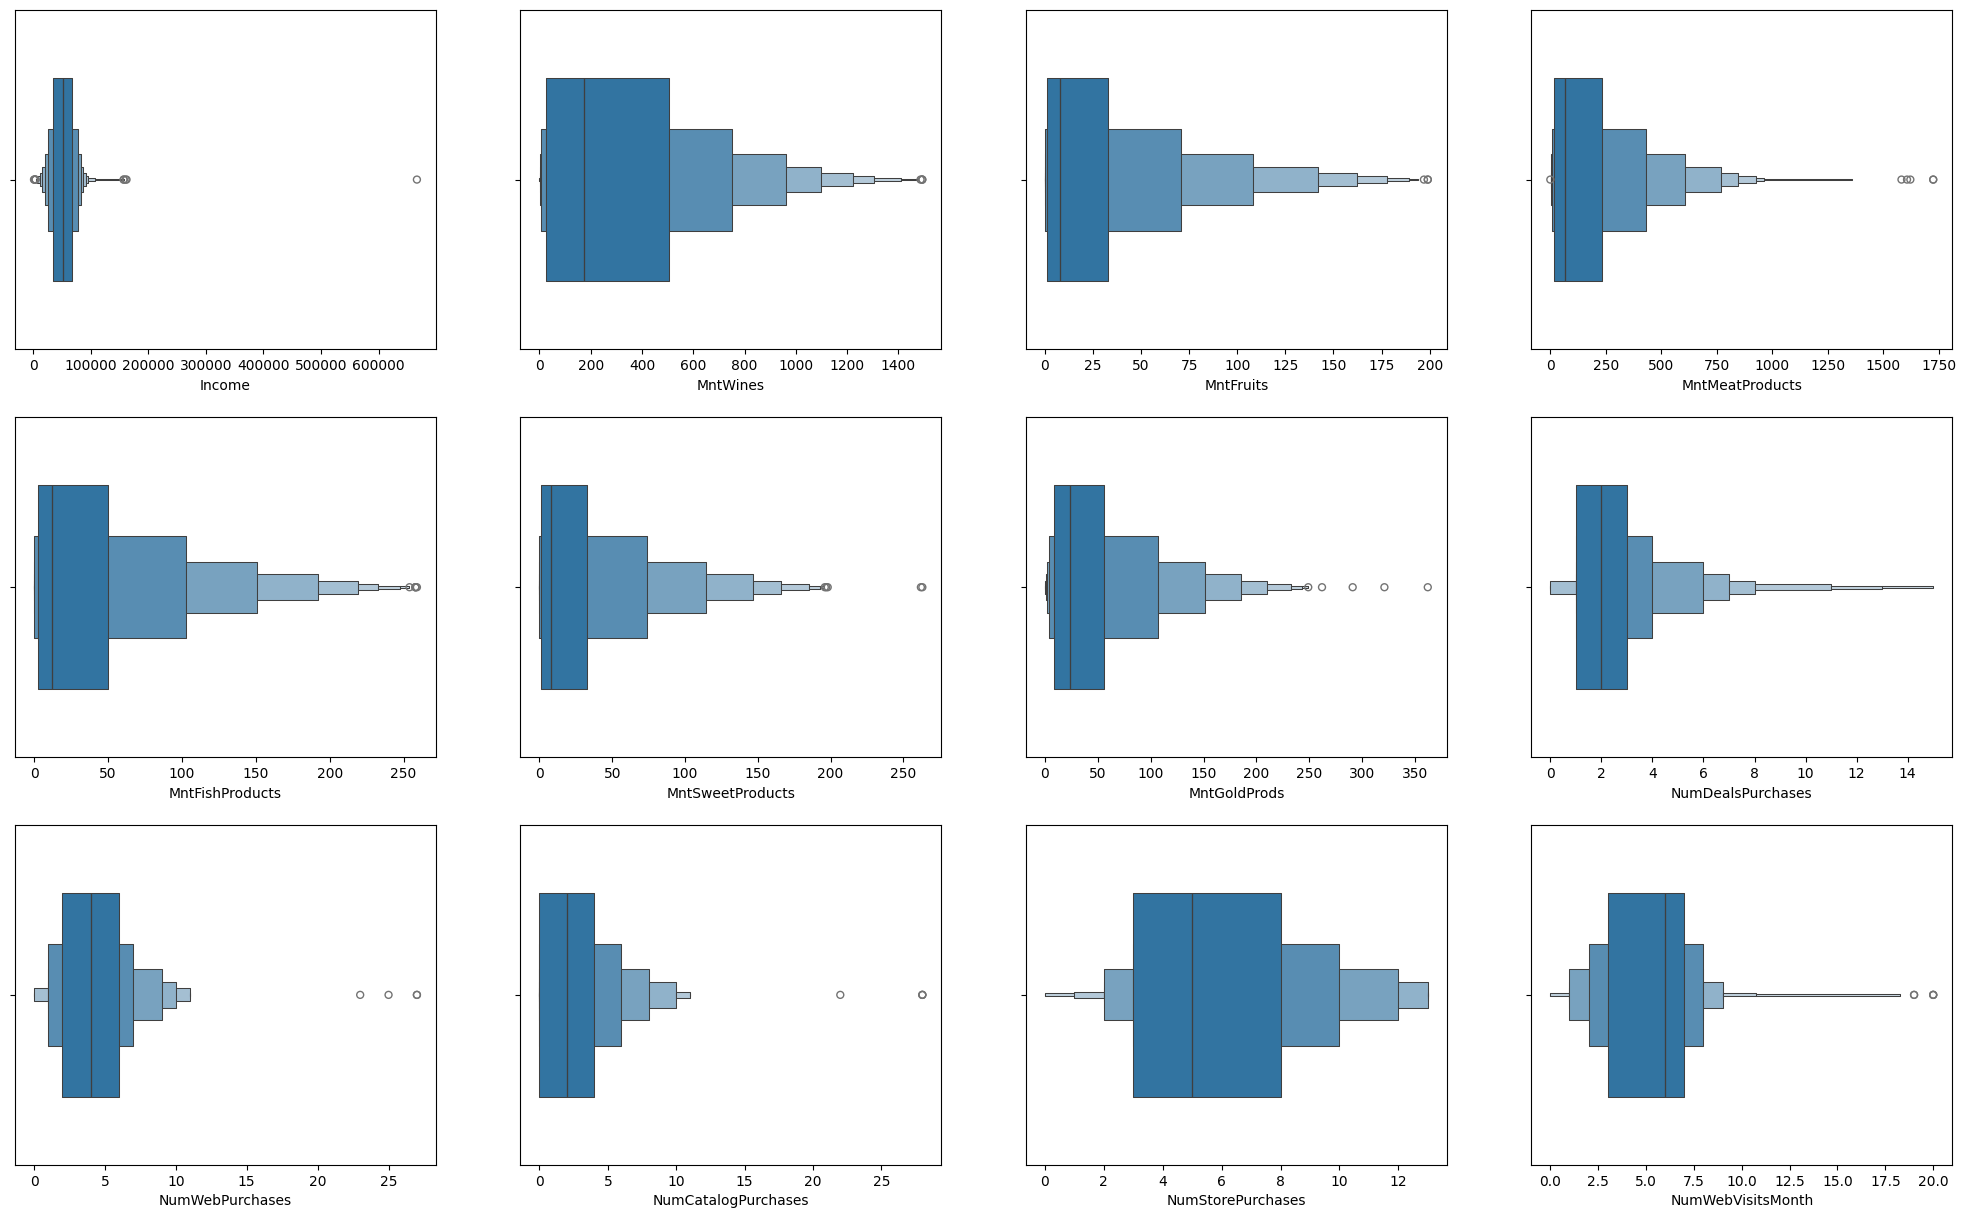

In [107]:
# Checking outliers in Detail
fig, axes = plt.subplots(3,4, figsize=(25,15))
p1 = sns.boxenplot(data=df_clean, x='Income', width=0.6, ax=axes[0,0])
p2 = sns.boxenplot(data=df_clean, x='MntWines', width=0.6, ax=axes[0,1])
p3 = sns.boxenplot(data=df_clean, x='MntFruits', width=0.6, ax=axes[0,2])
p4 = sns.boxenplot(data=df_clean, x='MntMeatProducts', width=0.6, ax=axes[0,3])
p5 = sns.boxenplot(data=df_clean, x='MntFishProducts', width=0.6, ax=axes[1,0])
p6 = sns.boxenplot(data=df_clean, x='MntSweetProducts', width=0.6, ax=axes[1,1])
p7 = sns.boxenplot(data=df_clean, x='MntGoldProds', width=0.6, ax=axes[1,2])
p8 = sns.boxenplot(data=df_clean, x='NumDealsPurchases', width=0.6, ax=axes[1,3])
p9 = sns.boxenplot(data=df_clean, x='NumWebPurchases', width=0.6, ax=axes[2,0])
p10 = sns.boxenplot(data=df_clean, x='NumCatalogPurchases', width=0.6, ax=axes[2,1])
p11 = sns.boxenplot(data=df_clean, x='NumStorePurchases', width=0.6, ax=axes[2,2])
p12 = sns.boxenplot(data=df_clean, x='NumWebVisitsMonth', width=0.6, ax=axes[2,3])
plot = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12]

plot

In [108]:
# Showing outliers data of each targeted column
cols = [
    'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth'
]

outlier_tables = {}

for col in cols:
    q1 = df_clean[col].describe()['25%']
    q3 = df_clean[col].describe()['75%']
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    outlier = df_clean[(df_clean[col] > upper)].sort_values(by=col)
    outlier_tables[col] = outlier

display(outlier_tables['Income'][['Income']].tail(10),outlier_tables['MntWines'][['MntWines']].tail(10),outlier_tables['MntFruits'][['MntFruits']].tail(10),
        outlier_tables['MntMeatProducts'][['MntMeatProducts']].tail(10),outlier_tables['MntFishProducts'][['MntFishProducts']].tail(10),
        outlier_tables['MntSweetProducts'][['MntSweetProducts']].tail(10),outlier_tables['MntGoldProds'][['MntGoldProds']].tail(10),outlier_tables['NumDealsPurchases'][['NumDealsPurchases']].tail(10),
        outlier_tables['NumWebPurchases'][['NumWebPurchases']].tail(10),outlier_tables['NumCatalogPurchases'][['NumCatalogPurchases']].tail(10),
        outlier_tables['NumStorePurchases'][['NumStorePurchases']].tail(10),outlier_tables['NumWebVisitsMonth'][['NumWebVisitsMonth']].tail(10))

,Income
655,153924.0
2132,156924.0
1653,157146.0
164,157243.0
1300,157733.0
687,160803.0
617,162397.0
2233,666666.0


,MntWines
497,1396
1488,1449
1641,1459
1961,1462
543,1478
917,1478
2098,1486
824,1492
559,1492
1749,1493


,MntFruits
198,189
447,190
1921,193
1946,193
109,194
2217,194
1526,194
1508,197
855,199
1480,199


,MntMeatProducts
1031,961
2109,968
456,974
1808,981
1358,984
164,1582
2228,1607
687,1622
21,1725
1653,1725


,MntFishProducts
766,247
914,250
926,250
2096,250
1601,253
214,254
1699,258
1799,258
1644,258
1199,259


,MntSweetProducts
470,192
456,194
2012,194
1484,194
1253,195
1671,196
1513,197
634,198
1898,262
27,263


,MntGoldProds
702,242
2093,245
1421,246
2235,247
2173,248
723,249
1328,262
1806,291
1975,321
27,362


,NumDealsPurchases
1788,13
287,13
1503,13
164,15
1042,15
1245,15
432,15
687,15
21,15
1846,15


,NumWebPurchases
1806,23
1975,25
27,27
1898,27


,NumCatalogPurchases
1828,11
1745,11
1492,11
1958,11
1940,11
1906,11
164,22
687,28
21,28
1653,28


,NumStorePurchases


,NumWebVisitsMonth
981,14
1524,14
1328,17
1042,19
1846,19
774,20
9,20
1245,20


Pengecekan outliers dilakukan dengan kombinasi boxplot visualisasi dan metode IQR pada variabel numerik utama, dimana hasilnya menunjukkan bahwa:
- Outlier ekstrem hanya terdapat pada kolom `Income` hanya 1 data dengan nilai **666,666** (jauh berbeda dari pola nilai maksimal sebelumnya sekitar **160,000**).
- Sementara outliers pada variabel lain seperti `MntMeatProducts`, `MntSweetProducts`, `MntGoldProds`, `NumWebPurchases`, dan `NumCatalogPurchases` cenderung merepresentasikan kelompok pelanggan dengan pola belanja tinggi, sehingga lebih tepat diperlakukan sebagai variasi data alami, bukan error.

In [109]:
# Deleting outliers
df_clean.drop(2233,inplace=True)

Outliers pada kolom `Income` dengan nilai **666,666** di drop supaya tidak merusak distribusi data

#### **Missing Values**

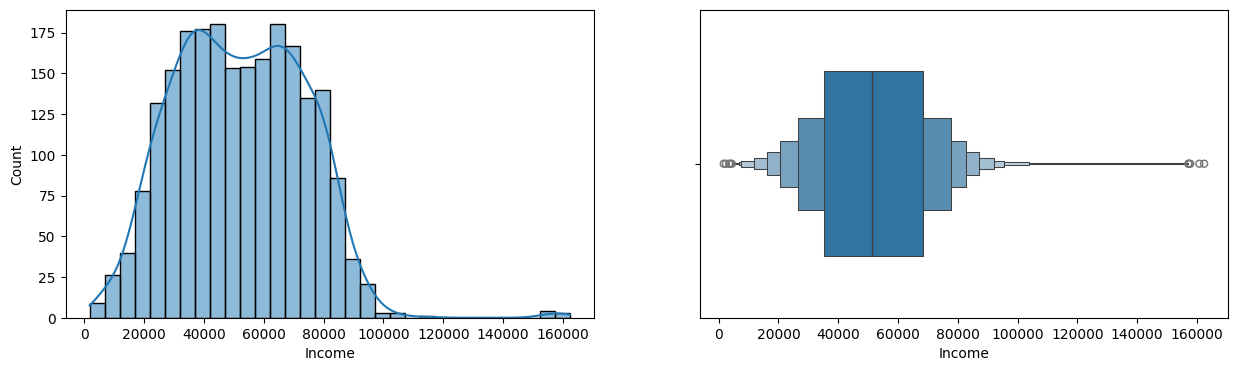

In [110]:
# Checking income dsitribution
fig, axes = plt.subplots(1,2, figsize=(15,4))
p1 = sns.histplot(data=df_clean, x='Income', kde=True, ax=axes[0])
p2 = sns.boxenplot(data=df_clean, x='Income', width=0.6, ax=axes[1])

In [111]:
# Checking income skewness
df_clean['Income'].skew()

np.float64(0.34734967591402816)

Nilai skew dari kolom `Income` ini lebih dari 0, akan tetapi msih dibawah 0.5, sehingga dapat di pastikan bahwa kategori data terdistribusi normal. Oleh karena itu untuk mengisi missing value pada kolom `Income` akan menggunakan Rata-Rata/Mean

In [112]:
# Handling income missing values
df_clean['Income'] = df_clean['Income'].fillna(df_clean['Income'].mean())

#### **Categorical Value Standardization**

In [113]:
# Changing irrelevant category in Education
df_clean.loc[df_clean['Education'] == '2n Cycle', 'Education'] = 'Master'

Pada kolom `Education` terdapat kategori **2n Cycle**. Setelah ditelusuri, kategori ini sebenarnya mewakili **2nd Cycle**, yang dalam konteks pendidikan dapat diartikan sebagai Master Degree

In [114]:
# Changing and grouping irrelevant category in Marital_Status
mapStats = {
    'Single': 'Single/Alone',
    'Alone': 'Single/Alone',
    'Together': 'Married/Partner',
    'Married': 'Married/Partner',
    'Divorced': 'Divorced/Widow',
    'Widow': 'Divorced/Widow'
}

df_clean['Marital_Status'] = df_clean['Marital_Status'].replace(mapStats)


Pada kolom `Marital_Statu`s terdapat beberapa kategori yang memiliki arti sama, diantarnya:
1. Single == Alone, sehingga kategori baru yamg dibuat adalah **"Single/Alone"**
2. Together == Married, sehingga kategori baru yamg dibuat adalah **"Married/Partner"**
3. Divorced == Widow, sehingga kategori baru yamg dibuat adalah **"Divorced/Widow"**

In [115]:
# Checking data with irrelavant category that can't be identified in Marital_Status
df_clean[(df_clean['Marital_Status'] == 'YOLO') | (df_clean['Marital_Status'] == 'Absurd')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1


In [116]:
# Deleting data with irrelavant category that can't be identified in Marital_Status
rowDrop = df_clean[(df_clean['Marital_Status'] == 'YOLO') | (df_clean['Marital_Status'] == 'Absurd')].index 
df_clean.drop(rowDrop, inplace=True)

Pada kolom `Marital_Status` terdapat dua kategori, yaitu **"YOLO"** dan **"Absurd"**, yang masing-masing hanya berisi 2 data. Untuk menjaga konsistensi serta distribusi data yang lebih representatif, baris dengan kategori tersebut dihapus.

#### **Change DataType**

In [117]:
# Changing Dt_Cutomer datatype
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format='%d-%m-%Y')

Pada kolom `Dt_Customer` data type semula adalah object atau string, oleh karena itu diganti dengan datetime sesuai dengan karakter data nya

#### **Deleting Irrelevant Column**

In [118]:
# Deleting irrelevant column that has no information both from the table or documentation
df_clean.drop('Z_CostContact', axis=1, inplace=True)
df_clean.drop('Z_Revenue', axis=1, inplace=True)

Kolom `Z_CostContact` dan `Z_Revenue` dihapus/drop karena tidak relevan, masing-masing kolom hanya memiliki 1 value dan tidak ada penjelasan sama sekali pada dokumentasi

#### **Creating Additional Column**

Fokus utama dari analisis data Supermarket Customer ini adalah "Analisis Karakteristik Customer yang Mempengaruhi Pola Spending di Supermarket".
Analisis difokuskan pada tiga pertanyaan utama, yaitu:
- Apakah tipe keluarga (No Kid, Small Family, Large Family) mempengaruhi spending belanja?
- Apakah tingkat pendapatan (Income) customer mempengaruhi spending belanja?
- Apakah metode pembelian (Channel/Type of Purchase) mempengaruhi spending belanja?

Untuk mendukung analisis tersebut, ditambahkan beberapa kolom baru, yaitu:
- FamilyType -- Hasil pengelompokan berdasarkan jumlah anak (`Kidhome` + `Teenhome`):
    1. No Kid = 0 anak
    2. Small Family = 1–2 anak
    3. Large Family = >2 anak
- FamilyCounts -- Total jumlah orang per keluarga yang ada di rumah.
- TotalSpending -- Total pengeluaran customer, diperoleh dari penjumlahan seluruh kolom kategori produk.
- TotalPurchases -- Total transaksi pembelian, diperoleh dari penjumlahan seluruh kolom jenis pembelian (store, web, catalog, dll).
- PreferredChannel -- Jenis channel/metode yang paling disukai oleh setiap customer saat melakukan belanja.

In [119]:
# Inserting new column of Fmaily Type, Total Spending, Total Purchase
def family_type(row):
    total_children = row['Kidhome'] + row['Teenhome']
    if total_children == 0:
        return 'No Kid'
    elif total_children <= 2:
        return 'Small Family'
    else:
        return 'Large Family'

total_spending = df_clean[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
total_purchase = df_clean[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

df_clean.insert(7,'FamilyType', df_clean.apply(family_type, axis=1))
df_clean.insert(16,'TotalProductSpend', total_spending)
df_clean.insert(21,'TotalChannelPurchase', total_purchase)

In [120]:
# Inserting new column of Family Counts
def fam_counts(row):
    total_children = row['Kidhome'] + row['Teenhome']
    stats = row['Marital_Status']
    if stats == 'Single/Alone' or stats == 'Divorced/Widow':
        return 1 + total_children
    elif stats == 'Married/Partner':
        return 2 + total_children

df_clean.insert(7,'FamilyCounts', df_clean.apply(fam_counts, axis=1))

In [121]:
# Identifying the Preferred Channel which has more than one preference
channel_cols = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

df_clean['MaxCount'] = df_clean[channel_cols].apply(lambda row: (row == row.max()).sum(), axis=1)
tie_customers = df_clean[df_clean['MaxCount'] > 1]
tie_customers[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','MaxCount']]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MaxCount
6,7,3,7,2
7,4,0,4,2
16,3,0,3,2
30,3,0,3,2
46,3,1,3,2
...,...,...,...,...
2199,3,0,3,2
2200,2,2,2,3
2201,8,8,6,2
2219,6,1,6,2


Penambahan kolom `Preferred Channel` akan ada tambahan kategori yaitu **Multi**, karena berdasarkan data diatas ada beberpa customer yang memiliki jumlah atau intensitas yang sama antar channel

In [122]:
# Inserting new column of Preferred Channel
def preferred_channel(row):
    max_val = row.max()
    max_cols = [col for col in row.index if row[col] == max_val]
    if len(max_cols) == 1:
        return max_cols[0]
    else:
        return 'Multi'

pref_channel = df_clean[channel_cols].apply(preferred_channel, axis=1).map({
    'NumWebPurchases':'Web',
    'NumCatalogPurchases':'Catalog',
    'NumStorePurchases':'Store',
    'Multi':'Multi'
})
df_clean.insert(23,'PreferredChannel', pref_channel)
df_clean.drop('MaxCount', axis=1, inplace=True)

#### **Clean Dataset**

In [123]:
df_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,FamilyCounts,FamilyType,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalProductSpend,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalChannelPurchase,PreferredChannel,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single/Alone,58138.0,0,0,1,No Kid,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,Catalog,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single/Alone,46344.0,1,1,3,Small Family,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,Store,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Married/Partner,71613.0,0,0,2,No Kid,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,Store,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Married/Partner,26646.0,1,0,3,Small Family,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,Store,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married/Partner,58293.0,1,0,3,Small Family,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,Store,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married/Partner,61223.0,0,1,3,Small Family,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,Web,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Married/Partner,64014.0,2,1,5,Large Family,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,15,Web,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced/Widow,56981.0,0,0,1,No Kid,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,Store,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Married/Partner,69245.0,0,1,3,Small Family,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,Store,3,0,0,0,0,0,0,0


In [124]:
display(df_clean.describe(),df_clean.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,FamilyCounts,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalProductSpend,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalChannelPurchase,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,5589.833557,1968.792841,51954.776140,0.444743,0.506488,2.596868,2013-07-10 16:21:15.704697856,49.158837,304.005369,26.276510,166.991051,37.418345,27.093065,43.894855,605.679195,2.322148,4.083221,2.659955,5.790604,12.533781,5.317226,0.072931,0.074720,0.072483,0.063982,0.013423,0.009396,0.148546
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,1.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2827.500000,1959.000000,35482.000000,0.000000,0.000000,2.000000,2013-01-17 00:00:00,24.000000,23.500000,1.000000,16.000000,3.000000,1.000000,9.000000,68.500000,1.000000,2.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,51717.000000,0.000000,0.000000,3.000000,2013-07-09 00:00:00,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,2.000000,4.000000,2.000000,5.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8423.500000,1977.000000,68277.500000,1.000000,1.000000,3.000000,2013-12-30 12:00:00,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,1044.500000,3.000000,6.000000,4.000000,8.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,5.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,32.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3244.948773,11.982027,21419.799263,0.538544,0.544631,0.906501,NaN,28.956073,336.894379,39.769406,225.807085,54.445376,41.306498,51.986889,602.532451,1.932159,2.780264,2.921195,3.253949,7.210426,2.425256,0.260081,0.262998,0.259344,0.244776,0.115102,0.096498,0.355720


,Education,Marital_Status,FamilyType,PreferredChannel
count,2235,2235,2235,2235
unique,4,3,3,4
top,Graduation,Married/Partner,Small Family,Store
freq,1125,1443,1546,1477


In [125]:
display(df_clean['Education'].unique(),df_clean['Marital_Status'].unique(),df_clean['FamilyType'].unique())

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

array(['Single/Alone', 'Married/Partner', 'Divorced/Widow'], dtype=object)

array(['No Kid', 'Small Family', 'Large Family'], dtype=object)

In [126]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2235 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2235 non-null   int64         
 1   Year_Birth            2235 non-null   int64         
 2   Education             2235 non-null   object        
 3   Marital_Status        2235 non-null   object        
 4   Income                2235 non-null   float64       
 5   Kidhome               2235 non-null   int64         
 6   Teenhome              2235 non-null   int64         
 7   FamilyCounts          2235 non-null   int64         
 8   FamilyType            2235 non-null   object        
 9   Dt_Customer           2235 non-null   datetime64[ns]
 10  Recency               2235 non-null   int64         
 11  MntWines              2235 non-null   int64         
 12  MntFruits             2235 non-null   int64         
 13  MntMeatProducts       2

In [127]:
df_clean.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
FamilyCounts            0
FamilyType              0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
TotalProductSpend       0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
TotalChannelPurchase    0
PreferredChannel        0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

[<Axes: xlabel='Income', ylabel='Count'>, <Axes: xlabel='Income'>]

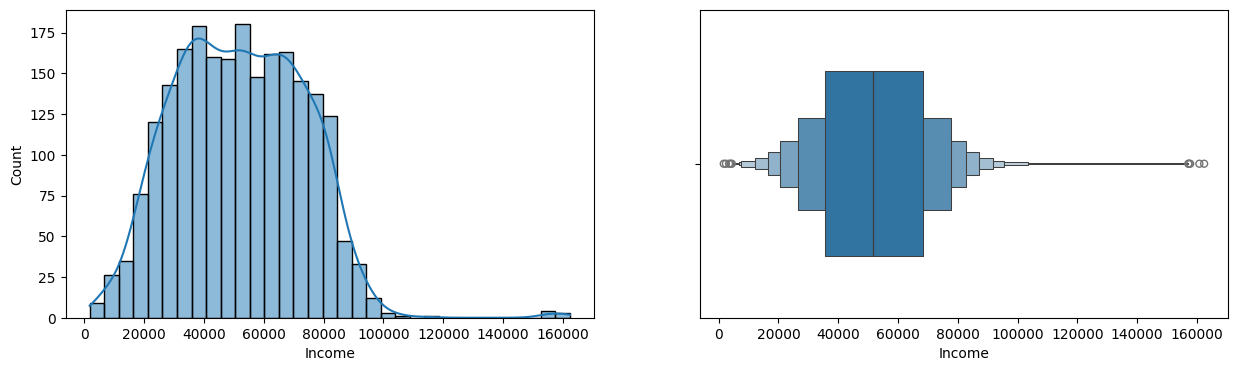

In [128]:
fig, axes = plt.subplots(1,2, figsize=(15,4))
p1 = sns.histplot(data=df_clean, x='Income', kde=True, ax=axes[0])
p2 = sns.boxenplot(data=df_clean, x='Income', width=0.6, ax=axes[1])
plot = [p1,p2]

plot

Setelah dilakukan proses Data Cleaning dataset sudah siap dilakukan analisa dengan beberapa perubahan sebagai berikut:
- Dataset Supermarket Customer telah berhasil dibersihkan. Dari awalnya terdapat 2.240 baris, kini tersisa 2.235 baris, setelah penghapusan sekitar 5 baris yang terdiri dari extreme outliers pada kolom `Income` dan kategori `Marital_Status` yang tidak relevan.
- Missing Values pada kolom `Income` sudah diisi menggunakan mean karena data income terdistribusi normal
- Selain itu, dua kolom telah dihapus, yaitu `Z_CostContact` dan `Z_Revenue`, karena nilainya sama di seluruh baris dan tidak memiliki penjelasan dalam dokumentasi.
- Sebagai tambahan, terdapat lima kolom baru yang ditambahkan untuk mendukung proses analisis data selanjutnya, terutama dalam melihat pola spending dan perilaku customer, yaitu:
    1. FamilyType
    2. FamilyCounts
    3. TotalProductSpend
    4. Preferred Channel
    5. TotalChannelPurchase

## **Data Analysis**

Pada tahap ini dilakukan analisis data untuk menggali insight terkait karakteristik customer yang mempengaruhi pola spending di supermarket. Fokus utama analisis ini adalah memahami faktor-faktor demografis dan perilaku belanja yang berpotensi memengaruhi tingkat pengeluaran pelanggan.

Terdapat tiga faktor/problem statement yang menjadi fokus analisa, yaitu:
1. Family Type & Spending → Apakah tipe keluarga (Single, Small Family, Large Family) memiliki perbedaan signifikan terhadap tingkat spending belanja?
2. Income & Spending → Sejauh mana tingkat pendapatan customer memengaruhi jumlah spending yang dilakukan?
3. Purchase Channel & Spending → Apakah metode pembelian (Store, Web, atau Catalog) berpengaruh terhadap pola spending customer?

### **Exploratory Data Analysis (EDA)**

Bagian EDA bertujuan untuk menjelajahi data secara awal dan mendapatkan insight awal tentang perilaku customer. Di sini kita akan melihat distribusi variabel utama seperti `Total Spending`, `Income`, `Family Type`, dan `Channel Preference`, serta hubungan awal antar variabel. Analisis ini membantu memahami pola dasar, variasi, dan hubungan antar variabel sebelum melakukan pengujian atau analisis yang lebih mendalam. Hasil EDA akan menjadi dasar dan pembuka bagi analisis mendalam selanjutnya.

In [129]:
df_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,FamilyCounts,FamilyType,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalProductSpend,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalChannelPurchase,PreferredChannel,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single/Alone,58138.0,0,0,1,No Kid,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,Catalog,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single/Alone,46344.0,1,1,3,Small Family,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,Store,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Married/Partner,71613.0,0,0,2,No Kid,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,Store,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Married/Partner,26646.0,1,0,3,Small Family,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,Store,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married/Partner,58293.0,1,0,3,Small Family,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,Store,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married/Partner,61223.0,0,1,3,Small Family,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,Web,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Married/Partner,64014.0,2,1,5,Large Family,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,15,Web,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced/Widow,56981.0,0,0,1,No Kid,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,Store,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Married/Partner,69245.0,0,1,3,Small Family,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,Store,3,0,0,0,0,0,0,0


In [130]:
df_clean[['ID']].nunique()

ID    2235
dtype: int64

#### **Distribusi Variable Utama**

Pada tahap ini dilakukan eksplorasi distribusi terhadap variabel-variabel utama dalam analisis. Fokus utama dari project ini adalah memahami **faktor atau karakteristik customer yang memengaruhi pola spending**, sehingga `Total Spending` menjadi objek inti yang dianalisis secara mendalam. Sementara itu, variabel lain seperti `Income`, `Family Type`, dan `Channel Preference` berperan sebagai faktor pendukung yang berpotensi memengaruhi spending tersebut.

Analisis distribusi ini bertujuan untuk:
- Menggambarkan pola umum data, apakah cenderung normal, skewed, atau terdapat outlier.
- Memahami karakteristik awal spending customer dan faktor-faktor yang berpotensi memengaruhinya.
- Memberikan gambaran awal yang akan digunakan sebagai pijakan untuk analisis hubungan antar variabel dan segmentasi customer pada tahap berikutnya.

##### ***Total Spending***

In [131]:
# Descriptive Statistics of Total Spending
df_clean[['TotalProductSpend']].describe()

,TotalProductSpend
count,2235.000000
mean,605.679195
std,602.532451
min,5.000000
25%,68.500000
50%,396.000000
75%,1044.500000
max,2525.000000


[<Axes: title={'center': 'Distribusi Total Spending'}, xlabel='Total Spending', ylabel='Frekuensi'>,
 <Axes: title={'center': 'Distribusi Total Spending'}, xlabel='Total Spending', ylabel='Frekuensi'>]

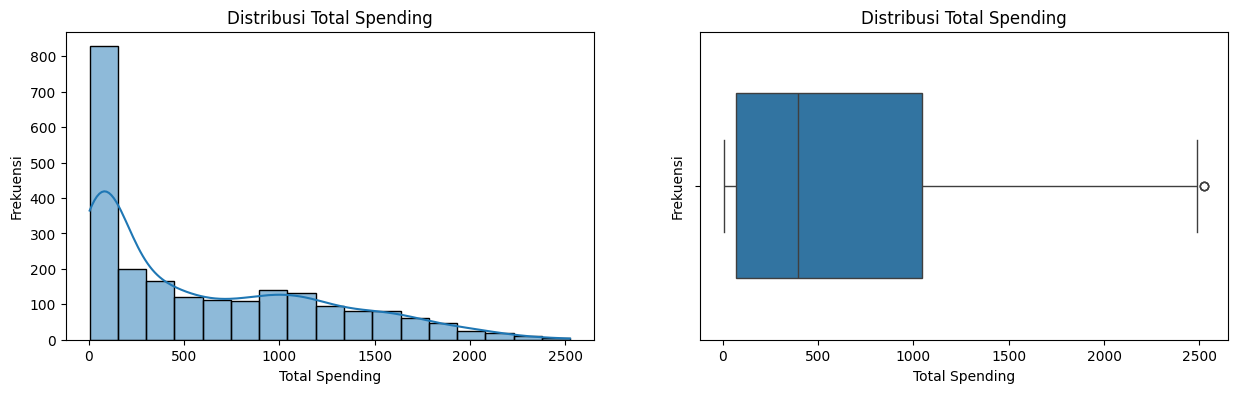

In [132]:
# Distribution of Total Spending
fig, axes = plt.subplots(1,2, figsize=(15,4))
p1 = sns.histplot(data=df_clean, x='TotalProductSpend', kde=True, ax=axes[0])
p2 = sns.boxplot(data=df_clean, x='TotalProductSpend', width=0.6, ax=axes[1])
axes[0].set_title("Distribusi Total Spending")
axes[0].set_xlabel("Total Spending")
axes[0].set_ylabel("Frekuensi")
axes[1].set_title("Distribusi Total Spending")
axes[1].set_xlabel("Total Spending")
axes[1].set_ylabel("Frekuensi")

plot = [p1,p2]
plot

In [133]:
# Skewness of Total Spending
spend_skew = df_clean['TotalProductSpend'].skew()

if spend_skew > 0.5:
    print(f'Skewness Total Spending = {spend_skew:.2f} --> data masuk dalam kategori right skewed - tidak terdistribusi normal')
elif spend_skew < -0.5:
    print(f'Skewness Total Spending = {spend_skew:.2f} --> data masuk dalam kategori left skewed - tidak terdistribusi normal')
else:
    print(f'Skewness Total Spending = {spend_skew:.2f} --> data terdistribusi normal')

Skewness Total Spending = 0.86 --> data masuk dalam kategori right skewed - tidak terdistribusi normal


In [134]:
# Mean, Median, Mode of Total Spending
print(f"""
Mean: {df_clean['TotalProductSpend'].mean()}
Median: {df_clean['TotalProductSpend'].median()}
Mode: {df_clean['TotalProductSpend'].mode()}""")


Mean: 605.6791946308725
Median: 396.0
Mode: 0    46
Name: TotalProductSpend, dtype: int64


In [135]:
# Checking outliers of Total Spending
q1 = df_clean['TotalProductSpend'].describe()['25%']
q3 = df_clean['TotalProductSpend'].describe()['75%']
iqr = q3 - q1
    
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
    
outlier = df_clean[(df_clean['TotalProductSpend'] > upper)][['ID','TotalProductSpend']]
high_spender = df_clean[['ID','TotalProductSpend']].sort_values(by='TotalProductSpend', ascending=False).head(10)

display(outlier,high_spender)

,ID,TotalProductSpend
1179,5735,2525
1492,1763,2524
1572,5350,2525


,ID,TotalProductSpend
1572,5350,2525
1179,5735,2525
1492,1763,2524
987,4580,2486
1052,4475,2440
1601,5453,2352
1458,10133,2349
1288,9010,2346
943,5386,2302
1301,6024,2302


Dari hasil analisa distribusi variable bagian  `Total Spending` diatas dapat dilihat bahwa:
- Rata-rata spending customer adalah **605.7**, dengan median 396 dan mode 46 > menunjukkan distribusi right-skewed (mean > median > mode).
- Distribusi tidak normal (Skewness = 0.86) dan sebagian besar customer melakukan spending rendah–menengah, hanya sedikit yang masuk kategori high spender.
- Terdapat 3 outlier di atas upper bound, namun jaraknya tidak jauh sehingga lebih tepat disebut high spender daripada data anomali.

Insight: Customer supermarket cenderung memiliki spending rendah, namun segmen kecil high spender menunjukkan bahwa pola belanja berbeda di antara kelompok customer, sehingga total spending menjadi indikator penting dari karakteristik customer yang mempengaruhi perilaku belanja.

##### ***Income***

In [136]:
# Descriptive Statistics of Income
df_clean[['Income']].describe()

,Income
count,2235.000000
mean,51954.776140
std,21419.799263
min,1730.000000
25%,35482.000000
50%,51717.000000
75%,68277.500000
max,162397.000000


[<Axes: title={'center': 'Distribusi Income'}, xlabel='Income', ylabel='Frekuensi'>,
 <Axes: title={'center': 'Distribusi Income'}, xlabel='Income', ylabel='Frekuensi'>]

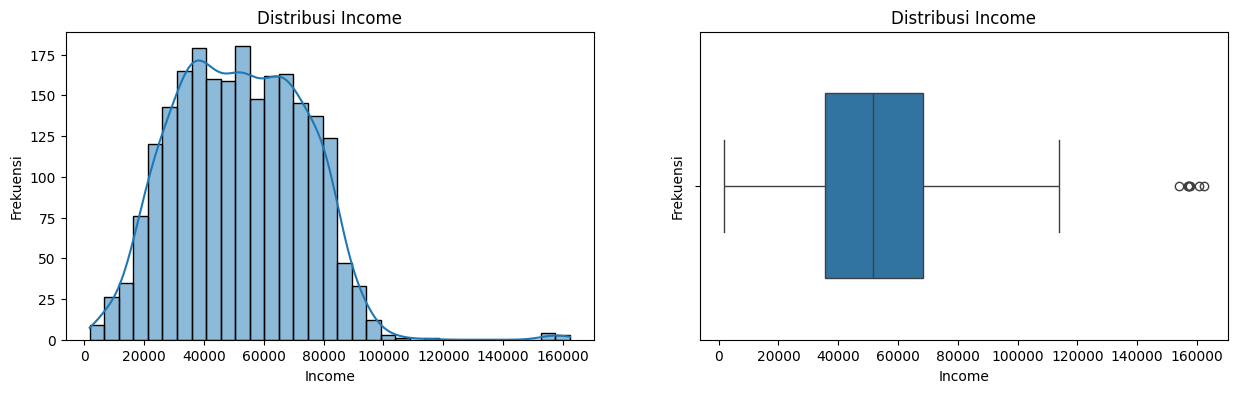

In [137]:
# Distribution of Income
fig, axes = plt.subplots(1,2, figsize=(15,4))
p1 = sns.histplot(data=df_clean, x='Income', kde=True, ax=axes[0])
p2 = sns.boxplot(data=df_clean, x='Income', width=0.6, ax=axes[1])
axes[0].set_title("Distribusi Income")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Frekuensi")
axes[1].set_title("Distribusi Income")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("Frekuensi")

plot = [p1,p2]
plot

In [138]:
# Skewness of Income
inc_skew = df_clean['Income'].skew()

if inc_skew > 0.5:
    print(f'Skewness Income = {inc_skew:.2f} --> data masuk dalam kategori right skewed - tidak terdistribusi normal')
elif inc_skew < -0.5:
    print(f'Skewness Income = {inc_skew:.2f} --> data masuk dalam kategori left skewed - tidak terdistribusi normal')
else:
    print(f'Skewness Income = {inc_skew:.2f} --> data terdistribusi normal')

Skewness Income = 0.35 --> data terdistribusi normal


In [139]:
# Mean, Median, Mode of Total Spending
print(f"""
Mean: {df_clean['Income'].mean()}
Median: {df_clean['Income'].median()}
Mode: {df_clean['Income'].mode()}""")


Mean: 51954.77614030836
Median: 51717.0
Mode: 0    51969.8614
Name: Income, dtype: float64


Dari hasil analisa distribusi variable bagian `Income` dapat dilihat bahwa:
- Rata-rata pendapatan customer adalah **51,955**, dengan **median 51,717** dan **modus 51,970**, menunjukkan distribusi yang cukup simetris (mean ≈ median ≈ mode).
- Rentang pendapatan customer cukup luas, antara 1,730 hingga 162,397, dengan kuartil pertama dan ketiga masing-masing 35,482 dan 68,278, serta standar deviasi 21,420. Hal ini menunjukkan variasi pendapatan yang wajar di antara pelanggan supermarket.
- Distribusi data normal (relatif-simetris) dengan skewness 0.35

Insight: Customer Supermarket memiliki pendapatan yang cukup beragam dengan sebagian besar berada di kisaran menengah, sementara segmen high income tetap terlihat wajar dan valid. Sehingga pendapatan merupakan salah satu karakteristik customer yang berpotensi mempengaruhi pola belanja.

##### ***Family Type***

`FamilyType`

In [140]:
# Summary Family Type
family_counts = df_clean['FamilyType'].value_counts()
family_percent = df_clean['FamilyType'].value_counts(normalize=True) * 100

family_summary = pd.DataFrame({
    'Count': family_counts,
    'Percentage (%)': family_percent.round(2)
})

family_summary

,Count,Percentage (%)
FamilyType,,
Small Family,1546,69.17
No Kid,636,28.46
Large Family,53,2.37


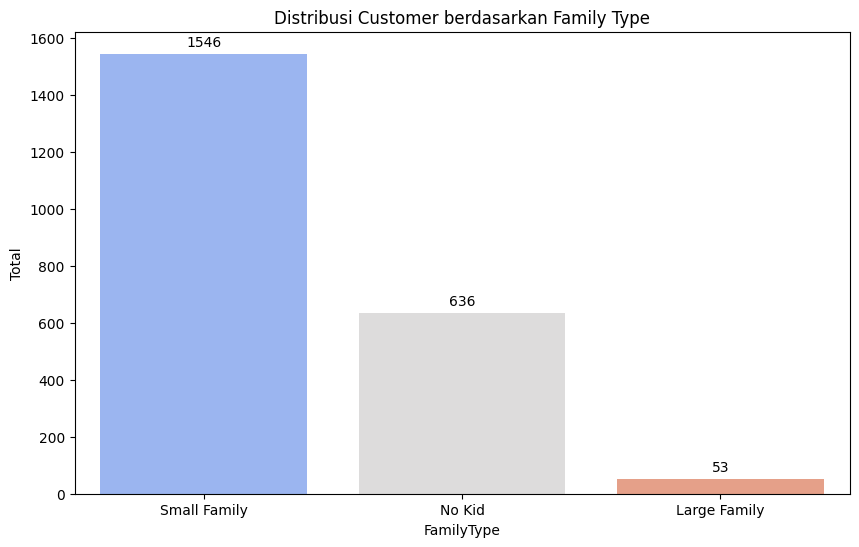

In [141]:
# Distribution of Family Type
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data = df_clean,
            x = 'FamilyType',
            y = 'ID',
            estimator = len,
            ci = 0,
            palette='coolwarm',
            order = family_counts.index)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.title('Distribusi Customer berdasarkan Family Type')
plt.ylabel('Total')
plt.show()

`FamilyCounts`

In [142]:
# Descriptive Statistics of Family Counts
df_clean[['FamilyCounts']].describe()

,FamilyCounts
count,2235.000000
mean,2.596868
std,0.906501
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,5.000000


[<Axes: title={'center': 'Distribusi Family Count'}, xlabel='Family Count', ylabel='Frekuensi'>,
 <Axes: title={'center': 'Distribusi Income'}, xlabel='Family Count', ylabel='Frekuensi'>]

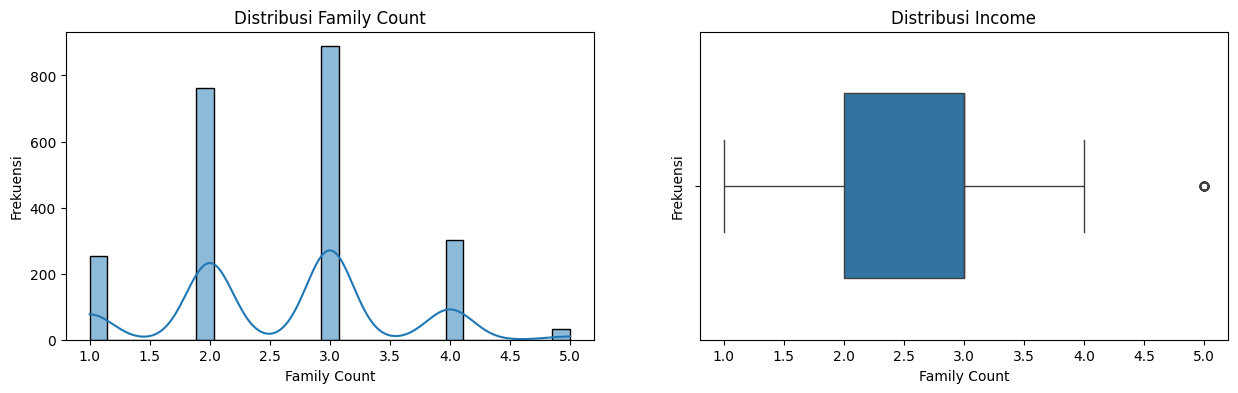

In [143]:
# Distribution of Family Counts
fig, axes = plt.subplots(1,2, figsize=(15,4))
p1 = sns.histplot(data=df_clean, x='FamilyCounts', kde=True, ax=axes[0])
p2 = sns.boxplot(data=df_clean, x='FamilyCounts', width=0.6, ax=axes[1])
axes[0].set_title("Distribusi Family Count")
axes[0].set_xlabel("Family Count")
axes[0].set_ylabel("Frekuensi")
axes[1].set_title("Distribusi Income")
axes[1].set_xlabel("Family Count")
axes[1].set_ylabel("Frekuensi")

plot = [p1,p2]
plot

In [144]:
# Skewness of Family Counts
fam_skew = df_clean['FamilyCounts'].skew()

if fam_skew > 0.5:
    print(f'Skewness Family Count = {fam_skew:.2f} --> data masuk dalam kategori right skewed - tidak terdistribusi normal')
elif fam_skew < -0.5:
    print(f'Skewness Family Count = {fam_skew:.2f} --> data masuk dalam kategori left skewed - tidak terdistribusi normal')
else:
    print(f'Skewness Family Count = {fam_skew:.2f} --> data terdistribusi normal')

Skewness Family Count = 0.09 --> data terdistribusi normal


In [145]:
# Mean, Median, Mode of Family Counts
print(f"""
Mean: {df_clean['FamilyCounts'].mean()}
Median: {df_clean['FamilyCounts'].median()}
Mode: {df_clean['FamilyCounts'].mode()}""")


Mean: 2.596868008948546
Median: 3.0
Mode: 0    3
Name: FamilyCounts, dtype: int64


Dari hasil analisa distribusi variable bagian `Family Type` di atas dapat dilihat bahwa:

- Mayoritas customer supermarket adalah **Small Family (69%)**, diikuti **No Kid (28%)** dan sedikit **Large Family (2%)** --> menunjukkan bahwa segmen keluarga kecil mendominasi basis customer.
- Variabel Family Counts memiliki nilai rata-rata 2.60, median 3, dan mode 3, dengan distribusi yang cenderung normal (skewness = 0.09).
- Distribusi Family Counts menunjukkan sebagian besar customer memiliki 2–3 anggota keluarga, dengan variasi relatif kecil (std = 0.90).
- Boxplot memperlihatkan bahwa mayoritas data berada dalam rentang wajar, dengan sedikit outlier pada family yang memiliki sebanyak 5 anggota keluarga.

Insight: Mayoritas customer supermarket berasal dari keluarga kecil dengan rata-rata jumlah anggota keluarga sekitar 3 orang, sehingga menunjukkan bahwa basis customer didominasi oleh segmen keluarga kecil. Hal ini penting karena ukuran keluarga berpotensi memengaruhi pola belanja, dimana keluarga besar meskipun jumlahnya sedikit dapat menjadi target potensial untuk strategi promosi bundling produk rumah tangga.

##### ***Channel Preference***

Each Channel Purchases
`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`

In [146]:
# Descriptive Statistics of Each Channel Purchases
df_clean[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2235.000000,2235.000000,2235.000000
mean,4.083221,2.659955,5.790604
std,2.780264,2.921195,3.253949
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,4.000000,2.000000,5.000000
75%,6.000000,4.000000,8.000000
max,27.000000,28.000000,13.000000


[<Axes: title={'center': 'Distribusi Web'}, xlabel='NumWebPurchases', ylabel='Frekuensi'>,
 <Axes: title={'center': 'Distribusi Web'}, xlabel='NumWebPurchases', ylabel='Frekuensi'>,
 <Axes: title={'center': 'Distribusi Catalog'}, xlabel='NumCatalogPurchases', ylabel='Frekuensi'>,
 <Axes: title={'center': 'Distribusi Catalog'}, xlabel='NumCatalogPurchases', ylabel='Frekuensi'>,
 <Axes: title={'center': 'Distribusi Store'}, xlabel='NumStorePurchases', ylabel='Frekuensi'>,
 <Axes: title={'center': 'Distribusi Store'}, xlabel='NumStorePurchases', ylabel='Frekuensi'>]

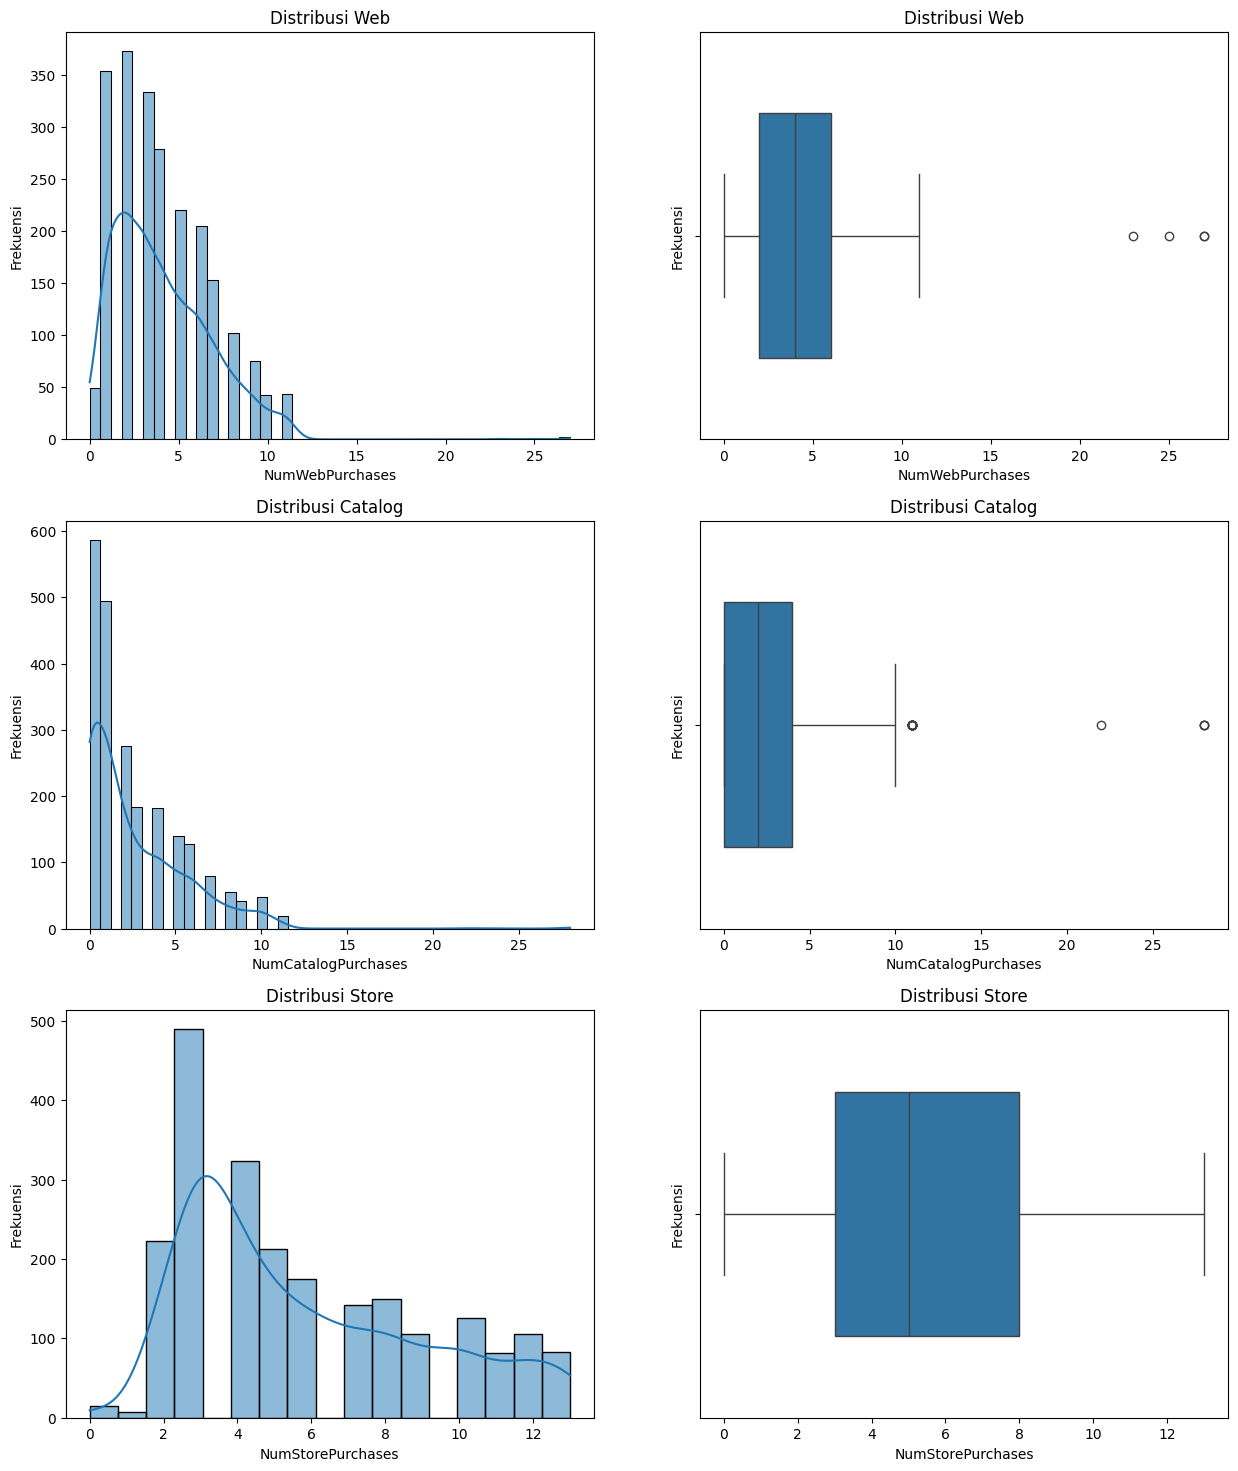

In [148]:
# Distribution of Each Channel Purchases
fig, axes = plt.subplots(3,2, figsize=(15,18))
p1 = sns.histplot(data=df_clean, x='NumWebPurchases', kde=True, ax=axes[0,0])
p2 = sns.boxplot(data=df_clean, x='NumWebPurchases', width=0.6, ax=axes[0,1])
axes[0,0].set_title("Distribusi Web")
axes[0,0].set_xlabel("NumWebPurchases")
axes[0,0].set_ylabel("Frekuensi")
axes[0,1].set_title("Distribusi Web")
axes[0,1].set_xlabel("NumWebPurchases")
axes[0,1].set_ylabel("Frekuensi")

p3 = sns.histplot(data=df_clean, x='NumCatalogPurchases', kde=True, ax=axes[1,0])
p4 = sns.boxplot(data=df_clean, x='NumCatalogPurchases', width=0.6, ax=axes[1,1])
axes[1,0].set_title("Distribusi Catalog")
axes[1,0].set_xlabel("NumCatalogPurchases")
axes[1,0].set_ylabel("Frekuensi")
axes[1,1].set_title("Distribusi Catalog")
axes[1,1].set_xlabel("NumCatalogPurchases")
axes[1,1].set_ylabel("Frekuensi")

p5 = sns.histplot(data=df_clean, x='NumStorePurchases', kde=True, ax=axes[2,0])
p6 = sns.boxplot(data=df_clean, x='NumStorePurchases', width=0.6, ax=axes[2,1])
axes[2,0].set_title("Distribusi Store")
axes[2,0].set_xlabel("NumStorePurchases")
axes[2,0].set_ylabel("Frekuensi")
axes[2,1].set_title("Distribusi Store")
axes[2,1].set_xlabel("NumStorePurchases")
axes[2,1].set_ylabel("Frekuensi")

plot = [p1,p2,p3,p4,p5,p6]
plot

In [149]:
# Skewness of Each Channel Purchases
cols = {'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}

for col,name in cols.items():
    purch_skew = df_clean[col].skew()

    if purch_skew > 0.5:
        print(f'Skewness Purchase {name} = {purch_skew:.2f} --> data masuk dalam kategori right skewed - tidak terdistribusi normal')
    elif purch_skew < -0.5:
        print(f'Skewness Purchase {name} = {purch_skew:.2f} --> data masuk dalam kategori left skewed - tidak terdistribusi normal')
    else:
        print(f'Skewness Purchase {name} = {purch_skew:.2f} --> data terdistribusi normal')

Skewness Purchase Web = 1.38 --> data masuk dalam kategori right skewed - tidak terdistribusi normal
Skewness Purchase Catalog = 1.88 --> data masuk dalam kategori right skewed - tidak terdistribusi normal
Skewness Purchase Store = 0.70 --> data masuk dalam kategori right skewed - tidak terdistribusi normal


In [150]:
# Mean, Median, Mode of Each Channel Purchases
cols = {'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}

for col, name in cols.items():
    print(f"""
    Channel: {name}
    Mean: {df_clean[col].mean()}
    Median: {df_clean[col].median()}
    Mode: {df_clean[col].mode()}\n""")


    Channel: Web
    Mean: 4.083221476510067
    Median: 4.0
    Mode: 0    2
Name: NumWebPurchases, dtype: int64


    Channel: Catalog
    Mean: 2.6599552572706937
    Median: 2.0
    Mode: 0    0
Name: NumCatalogPurchases, dtype: int64


    Channel: Store
    Mean: 5.790604026845638
    Median: 5.0
    Mode: 0    3
Name: NumStorePurchases, dtype: int64



`PreferredChannel`

In [151]:
# Summary Preferred Channel
channel_counts = df_clean['PreferredChannel'].value_counts()
channel_percent = df_clean['PreferredChannel'].value_counts(normalize=True) * 100

channel_summary = pd.DataFrame({
    'Count': channel_counts,
    'Percentage (%)': channel_percent.round(2)
})

channel_summary

,Count,Percentage (%)
PreferredChannel,,
Store,1477,66.09
Web,323,14.45
Multi,299,13.38
Catalog,136,6.09


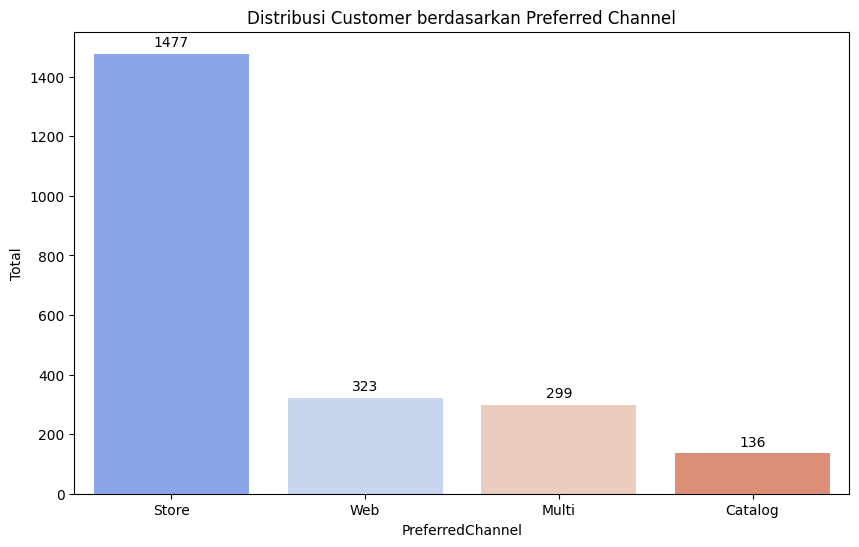

In [152]:
# Distribution of Preferred Channel
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data = df_clean,
            x = 'PreferredChannel',
            y = 'ID',
            estimator = len,
            ci = 0,
            palette='coolwarm',
            order = channel_counts.index)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.title('Distribusi Customer berdasarkan Preferred Channel')
plt.ylabel('Total')
plt.show()

`TotalChannelPurchase`

In [153]:
# Descriptive Statistics of Total Channel Purchase
df_clean[['TotalChannelPurchase']].describe()

,TotalChannelPurchase
count,2235.000000
mean,12.533781
std,7.210426
min,0.000000
25%,6.000000
50%,12.000000
75%,18.000000
max,32.000000


[<Axes: title={'center': 'Distribusi Total Channel Purchase'}, xlabel='Total Channel Purchase', ylabel='Frekuensi'>,
 <Axes: title={'center': 'Distribusi Total Channel Purchase'}, xlabel='Total Channel Purchase', ylabel='Frekuensi'>]

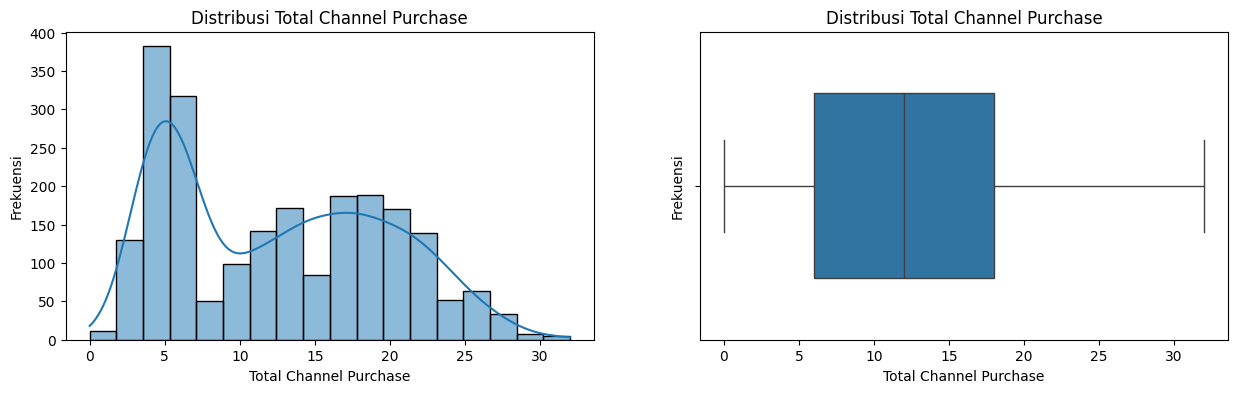

In [154]:
# Descriptive Statistics of Total Channel Purchase
fig, axes = plt.subplots(1,2, figsize=(15,4))
p1 = sns.histplot(data=df_clean, x='TotalChannelPurchase', kde=True, ax=axes[0])
p2 = sns.boxplot(data=df_clean, x='TotalChannelPurchase', width=0.6, ax=axes[1])
axes[0].set_title("Distribusi Total Channel Purchase")
axes[0].set_xlabel("Total Channel Purchase")
axes[0].set_ylabel("Frekuensi")
axes[1].set_title("Distribusi Total Channel Purchase")
axes[1].set_xlabel("Total Channel Purchase")
axes[1].set_ylabel("Frekuensi")

plot = [p1,p2]
plot

In [155]:
# Skewness of Total Channel Purchase
channel_skew = df_clean['TotalChannelPurchase'].skew()

if channel_skew > 0.5:
    print(f'Skewness Total Channel Purchase = {channel_skew:.2f} --> data masuk dalam kategori right skewed - tidak terdistribusi normal')
elif channel_skew < -0.5:
    print(f'Skewness Total Channel Purchase = {channel_skew:.2f} --> data masuk dalam kategori left skewed - tidak terdistribusi normal')
else:
    print(f'Skewness Total Channel Purchase = {channel_skew:.2f} --> data terdistribusi normal')

Skewness Total Channel Purchase = 0.30 --> data terdistribusi normal


In [156]:
# Mean, Median, Mode of Total Channel Purchase
print(f"""
Mean: {df_clean['TotalChannelPurchase'].mean()}
Median: {df_clean['TotalChannelPurchase'].median()}
Mode: {df_clean['TotalChannelPurchase'].mode()}""")


Mean: 12.533780760626398
Median: 12.0
Mode: 0    4
Name: TotalChannelPurchase, dtype: int64


Dari hasil analisa distribusi variable bagian Channel Preference di atas dapat dilihat bahwa:
- Sebagian besar customer supermarket melakukan pembelian melalui **Store (rata-rata 5.79)**, diikuti **Web (rata-rata 4.08)**, sementara **Catalog (rata-rata 2.66)** digunakan paling sedikit --> menunjukkan bahwa channel Store mendominasi aktivitas belanja customer.
- Median dan mode memperkuat pola ini: pembelian melalui Store cenderung lebih sering dilakukan dibanding Web dan Catalog.
- Distribusi pembelian tidak merata antar channel, sehingga sebagian besar pola belanja kemungkinan dipengaruhi oleh preferensi channel Store.
- Dari segi Preferred Channel, mayoritas customer lebih memilih **Store (66.09%)**, diikuti **Web (14.45%)**, **Multi (13.38%)**, dan paling sedikit **Catalog (6.09%)**.
- Variabel Total Channel Purchase memiliki rata-rata 12.53, median 12, dan mode 4, dengan distribusi relatif normal (skewness = 0.30). Sebagian besar customer melakukan pembelian antara 6–18 kali, dengan maksimum tercatat 32 kali.

Insight: Channel Store menjadi channel utama bagi customer supermarket baik dari sisi frekuensi pembelian maupun preferensi utama, sementara Web, Multi, dan Catalog digunakan oleh segmen yang lebih kecil; secara keseluruhan, jumlah pembelian antar channel terdistribusi cukup normal dengan median 12 kali, sehingga channel preference dan intensitas pembelian melalui channel menjadi salah satu karakteristik penting yang memengaruhi pola belanja customer.

#### **Hubungan Awal Antar Variabel**

Setelah memahami distribusi masing-masing variabel utama, tahap berikutnya adalah mengeksplorasi hubungan antar variabel yang berpotensi memengaruhi pola spending customer. Pada tahap ini, `Total Spending` tetap menjadi variabel inti, sementara `Income`, `Family Type`, dan `Channel Preference` dianalisis sebagai faktor yang dapat berasosiasi dengan tingkat pengeluaran customer.

Analisis hubungan awal ini bertujuan untuk:
- Mengidentifikasi apakah terdapat pola linier atau perbedaan mencolok antar kelompok.
- Menemukan indikasi awal mengenai variabel mana yang mungkin memiliki peran penting terhadap variasi `Total Spending`.
- Menyediakan dasar eksplorasi sebelum dilakukan analisis inferensial pada tahap selanjutnya.

Dengan kata lain, tahap ini membantu melihat korelasi awal dan perbedaan antar segmen customer, sehingga dapat memberikan gambaran awal mengenai faktor-faktor yang berkontribusi terhadap perbedaan perilaku spending.

##### ***Income vs Total Spending***

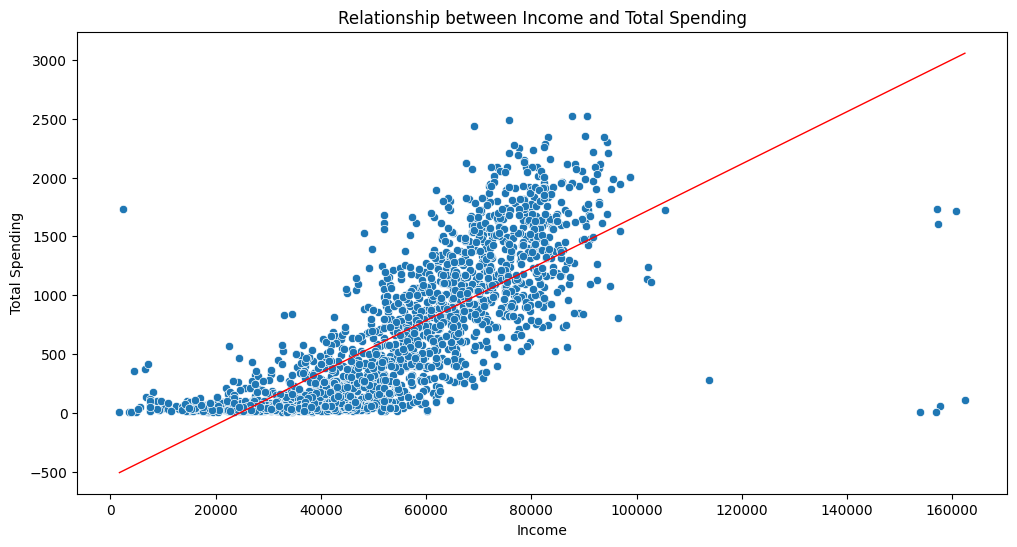

In [157]:
# Relationship between Income and Total Spending
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_clean,
                x = "Income",
                y = "TotalProductSpend")
sns.regplot(data = df_clean, x='Income', y='TotalProductSpend',
            scatter=False, color='red', line_kws={"linewidth":1},ci=0)

plt.title("Relationship between Income and Total Spending")
plt.ylabel('Total Spending')
plt.show()

Berdasarkan skewness distribusi data `Income` pada analisis **Distribusi Variabel Utama**, nilai skew sebesar **0.35** menunjukkan distribusi normal (relatif simetris). Sedangkan skewness distribusi data `Total Spending` sebesar 0.86 menunjukkan distribusi right-skewed. Oleh karena itu, korelasi yang digunakan untuk melihat hubungan `Income` dan `Total Spending` adalah **Spearman**.

In [158]:
# Correlation between Income and Total Spending
corrIncTable = df_clean[['Income', 'TotalProductSpend']].corr('spearman')
corrIncVal = df_clean['Income'].corr(df_clean['TotalProductSpend'],'spearman')
display(corrIncTable,
        print(f'Nilai korelasi antara Income dan Total Spending = {corrIncVal:.2f}'))

Nilai korelasi antara Income dan Total Spending = 0.85


,Income,TotalProductSpend
Income,1.000000,0.848592
TotalProductSpend,0.848592,1.000000


None

Analisa hubungan variabel antara `Income` vs `Total Spending`, menunjukkan bahwa:
- Scatter plot menunjukkan pola positif: customer dengan income lebih tinggi cenderung memiliki total spending lebih tinggi. Garis tren linear memperjelas hubungan ini.
- Korelasi Spearman sebesar **0.85** menegaskan hubungan positif cukup kuat antara `Income` dan `Total Spending`.
- Terlihat adanya variasi total spending di tiap level income, menunjukkan bahwa meskipun secara umum customer dengan income tinggi cenderung memiliki pengeluaran lebih tinggi, sebagian kecil customer menyimpang dari pola ini.

Insight: Income merupakan salah satu faktor utama yang mempengaruhi total spending customer. Semakin tinggi income, semakin besar kecenderungan customer untuk melakukan pengeluaran lebih tinggi, namun tetap ada variasi individual, sehingga Income menjadi karakteristik penting dalam memahami pola belanja customer.

##### ***Family vs Total Spending***

In [159]:
# Descriptive Statistics between Family Type and Total Spending
family_stats = df_clean.groupby(by='FamilyType')['TotalProductSpend'].describe()
family_stats

,count,mean,std,min,25%,50%,75%,max
FamilyType,,,,,,,,
Large Family,53.0,274.603774,414.277051,8.0,35.00,88.0,348.00,1616.0
No Kid,636.0,1105.757862,645.996759,6.0,625.75,1189.5,1597.25,2525.0
Small Family,1546.0,411.304657,450.714100,5.0,55.00,208.0,678.50,2194.0


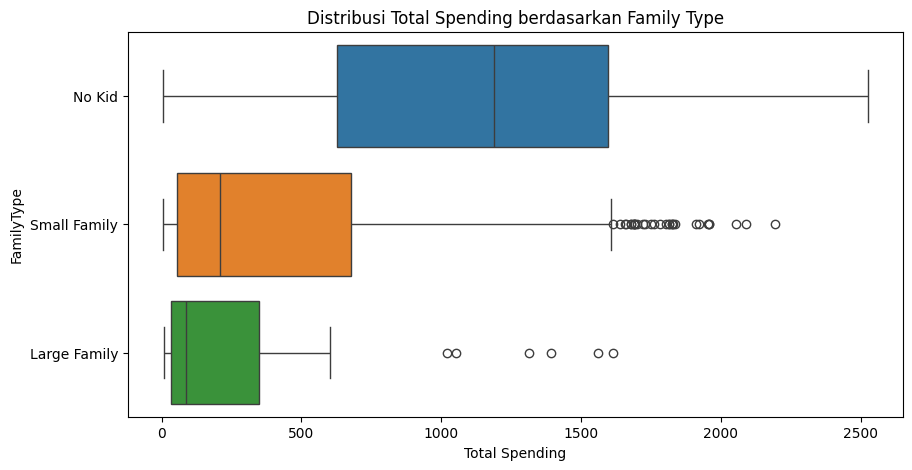

In [160]:
# Distribution between Family Type and Total Spending
plt.figure(figsize=(10, 5))

sns.boxplot(data = df_clean,
            x = 'TotalProductSpend',
            y = 'FamilyType',
            hue = 'FamilyType')

plt.title('Distribusi Total Spending berdasarkan Family Type')
plt.xlabel('Total Spending')
plt.show()

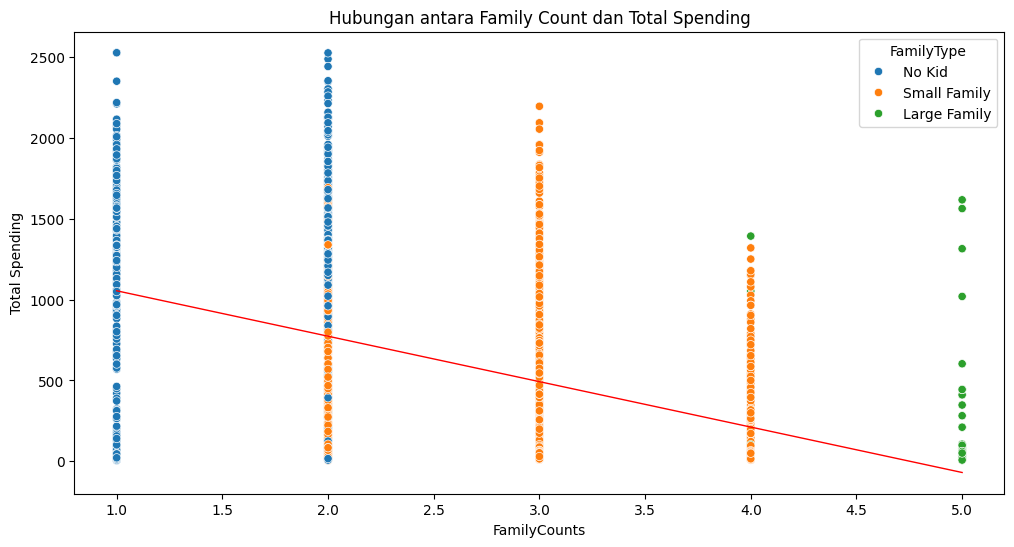

In [161]:
# Relationship between Family Counts and Total Spending
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_clean,
                x = "FamilyCounts",
                y = "TotalProductSpend",
                hue = "FamilyType")
sns.regplot(data = df_clean, x='FamilyCounts', y='TotalProductSpend',
            scatter=False, color='red', line_kws={"linewidth":1},ci=0)

plt.title("Hubungan antara Family Count dan Total Spending")
plt.ylabel('Total Spending')
plt.show()

Berdasarkan skewness distribusi data `FamilyCounts` pada analisis **Distribusi Variabel Utama**, nilai skew sebesar **0.09** menunjukkan distribusi normal. Sedangkan skewness distribusi data `Total Spending` sebesar 0.86 menunjukkan distribusi right-skewed. Oleh karena itu, korelasi yang digunakan untuk melihat hubungan `FamilyCounts` dan `Total Spending` adalah **Spearman**.

In [162]:
# Correlation between Family Counts and Total Spending
corrFamTable = df_clean[['FamilyCounts', 'TotalProductSpend']].corr('spearman')
corrFamVal = df_clean['FamilyCounts'].corr(df_clean['TotalProductSpend'],'spearman')
display(corrFamTable,
        print(f'Nilai korelasi antara Family Counts dan Total Spending = {corrFamVal:.2f}'))

Nilai korelasi antara Family Counts dan Total Spending = -0.40


,FamilyCounts,TotalProductSpend
FamilyCounts,1.000000,-0.397487
TotalProductSpend,-0.397487,1.000000


None

Analisa hubungan variabel antara `Family Type` vs `Total Spending` menunjukkan bahwa:
- Boxplot menampilkan perbedaan total spending antar tipe keluarga. Customer dengan **No Kid** dan **Small Family** memiliki total spending rata-rata lebih tinggi dibanding **Large Family**, namun variasi individual terlihat cukup besar terutama pada **Small Family**.
- Statistik deskriptif memperkuat pola ini:
    1. No Kid: mean(1105), median(1189), range(6 – 2525) --> variasi besar dan beberapa outlier tinggi
    2. Small Family: mean(411), median(108), range(5 – 2194) --> variasi sangat besar, banyak outlier tinggi
    3. Large Family: mean(275), median(88), range(8 – 1616) --> total spending relatif lebih rendah, outlier tinggi muncul tapi jumlah lebih sedikit
- Scatterplot `FamilyCounts` vs `Total Spending` menunjukkan tren menurun: semakin besar jumlah anggota keluarga, spending cenderung lebih rendah. Hal ini mengindikasikan bahwa household size memiliki hubungan negatif dengan spending.
- Nilai korelasi Spearman antara `FamilyCounts` dan `Total Spending` sebesar **-0.40**, yang berarti hubungan negatif sedang: semakin besar ukuran keluarga, spending rata-rata semakin rendah.
- Terlihat adanya variasi individual di tiap kategori, menunjukkan bahwa meskipun tipe keluarga mempengaruhi total spending, sebagian kecil customer menyimpang dari pola umum.

Insight: `Family Type` merupakan salah satu faktor yang memengaruhi total spending customer. Pola menunjukkan bahwa customer tanpa anak atau dengan keluarga kecil cenderung mengeluarkan lebih banyak dibanding keluarga besar. Tren negatif pada scatterplot diperkuat dengan hasil korelasi Spearman **(-0.40)**, yang menunjukkan bahwa semakin besar ukuran keluarga, spending semakin menurun. Namun, adanya variasi individual mengindikasikan faktor lain (selain Family Type) juga berperan, sehingga karakteristik ini penting tetapi bukan satu-satunya penentu pola belanja customer.

##### ***Channel Preferemce vs Total Spending***

In [163]:
# Descriptive Statistics between Channel Preference and Total Spending
channel_stats = df_clean.groupby(by='PreferredChannel')['TotalProductSpend'].describe()
channel_stats

,count,mean,std,min,25%,50%,75%,max
PreferredChannel,,,,,,,,
Catalog,136.0,1345.330882,496.554082,178.0,999.0,1428.0,1689.0,2524.0
Multi,299.0,458.896321,519.538656,5.0,80.5,211.0,642.0,2486.0
Store,1477.0,554.388626,602.860515,8.0,50.0,252.0,1001.0,2525.0
Web,323.0,664.662539,482.704538,32.0,310.0,521.0,958.5,2194.0


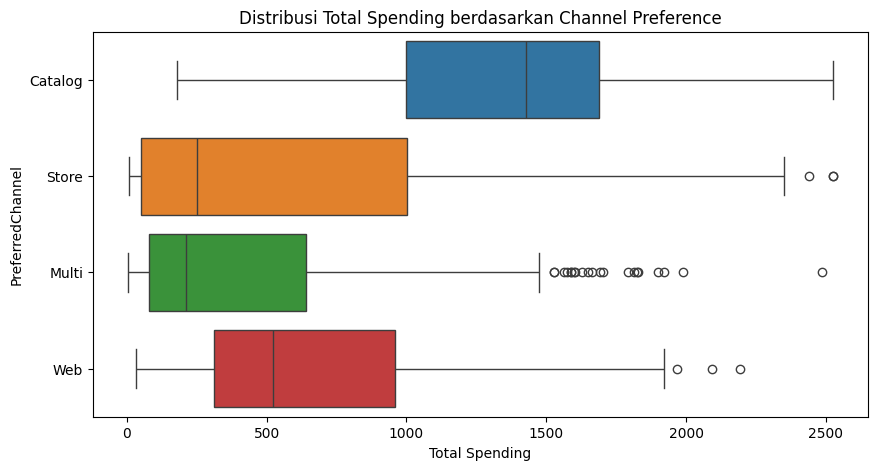

In [164]:
# Distribution between Channel Preference and Total Spending
plt.figure(figsize=(10, 5))

sns.boxplot(data = df_clean,
            x = 'TotalProductSpend',
            y = 'PreferredChannel',
            hue = 'PreferredChannel')

plt.title('Distribusi Total Spending berdasarkan Channel Preference')
plt.xlabel('Total Spending')
plt.show()

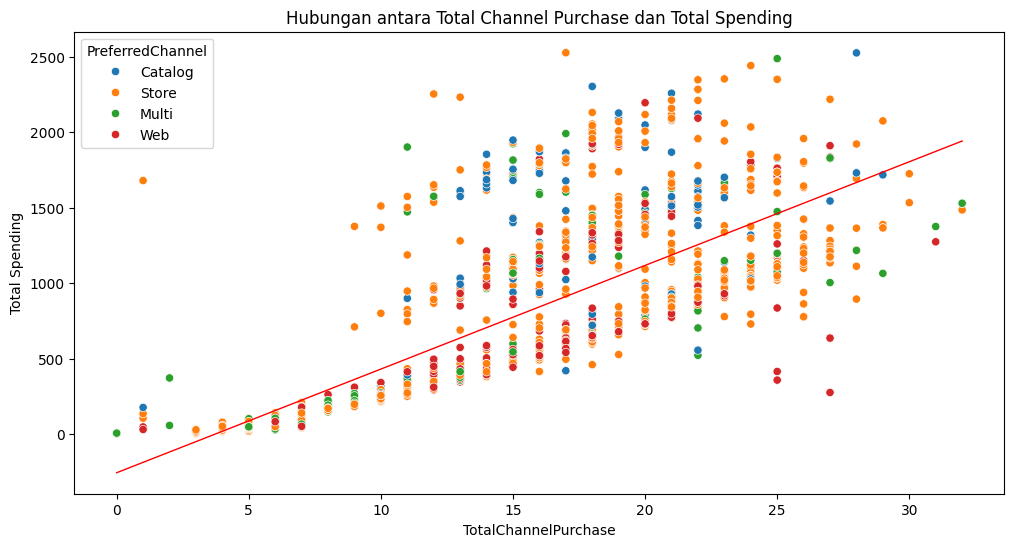

In [165]:
# Relationship between Total Channel Purchase and Total Spending
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_clean,
                x = "TotalChannelPurchase",
                y = "TotalProductSpend",
                hue = "PreferredChannel")
sns.regplot(data = df_clean, x='TotalChannelPurchase', y='TotalProductSpend',
            scatter=False, color='red', line_kws={"linewidth":1},ci=0)

plt.title("Hubungan antara Total Channel Purchase dan Total Spending")
plt.ylabel('Total Spending')
plt.show()

Berdasarkan skewness distribusi data `TotalChannelPurchase` pada analisis **Distribusi Variabel Utama**, nilai skew sebesar **0.30** menunjukkan distribusi normal (relatif simetris). Sedangkan skewness distribusi data `Total Spending` sebesar 0.86 menunjukkan distribusi right-skewed. Oleh karena itu, korelasi yang digunakan untuk melihat hubungan `TotalChannelPurchase` dan `Total Spending` adalah **Spearman**.

In [166]:
# Correlation between Total Channel Purchase and Total Spending
corrChannelTable = df_clean[['TotalChannelPurchase', 'TotalProductSpend']].corr('spearman')
corrChannelVal = df_clean['TotalChannelPurchase'].corr(df_clean['TotalProductSpend'],'spearman')
display(corrChannelTable,
        print(f'Nilai korelasi antara Total Channel Purchase dan Total Spending = {corrChannelVal:.2f}'))

Nilai korelasi antara Total Channel Purchase dan Total Spending = 0.91


,TotalChannelPurchase,TotalProductSpend
TotalChannelPurchase,1.000000,0.908407
TotalProductSpend,0.908407,1.000000


None

Analisa hubungan variabel antara `Preferred Channel` vs `Total Spending` menunjukkan bahwa:
- Boxplot menampilkan perbedaan spending antar channel. Customer **Catalog** memiliki rata-rata spending tertinggi dan relatif konsisten. Kemudian **Store** dan **Web** rata-rata spending sedang dengan variasi besar, sementara **Multi-channel** justru cenderung lebih rendah rata-ratanya meskipun ada outlier tinggi.
- Statistik deskriptif memperkuat pola ini:
    1. Catalog: mean(1345), median(1428), range(178–2524) --> spending tertinggi dan stabil
    2. Store: mean(554), median(252), range(8–2525) --> variasi sangat besar, banyak spending rendah dengan sedikit outlier tinggi
    3. Web: mean(665), median(521), range(32–2194) --> spending menengah dengan variasi cukup tinggi
    4. Multi: mean(459), median(211), range(5–2486) --> spending relatif rendah dengan beberapa outlier tinggi
- Scatterplot Total `Channel Purchases` vs `Total Spending` menunjukkan tren positif: semakin banyak purchase pada channel apapun, spending cenderung meningkat. **Store** & **Catalog** lebih sering muncul pada level pembelian tinggi, sedangkan **Web** cenderung di level menengah/rendah. **Multi-channel** tersebar acak dengan beberapa outlier spending sangat tinggi.
- Nilai korelasi Spearman antara `Total Channel Purchase` dan `Total Spending` sebesar **0.91**, yang menunjukkan hubungan positif sangat kuat. Hal ini memperkuat bahwa peningkatan frekuensi pembelian di channel tertentu hampir sejalan dengan kenaikan total spending.

Insight: Preferred Channel berperan penting dalam memengaruhi total spending. **Catalog** menonjol dengan spending tertinggi dan konsisten, **Store** & **Web** sedang, sementara **Multi-channel** tidak otomatis lebih tinggi justru cenderung rendah. Pola scatterplot diperkuat dengan hasil korelasi Spearman **(0.91)**, yang menunjukkan hubungan positif kuat antara intensitas pembelian di channel dengan total spending. Artinya, semakin sering customer bertransaksi melalui channel tertentu, semakin besar pula kontribusi spending yang mereka berikan bagi supermarket.

#### **Korelasi Antar Variabel Utama**

Setelah memahami distribusi variabel utama serta hubungan awal antar variabel terhadap Total Spending, tahap berikutnya adalah menganalisis korelasi antar variabel numerik yang relevan dengan spending. Pada tahap ini, variabel yang digunakan meliputi:
- `Income` --> faktor demografis utama yang memengaruhi daya beli.
- `FamilyCounts` --> merepresentasikan tanggungan keluarga yang dapat memengaruhi kebutuhan belanja.
- `TotalChannelPurchase` --> indikator intensitas pembelian produk.
- `TotalProductSpend` --> variabel inti sebagai tolok ukur utama customer value.

Analisis korelasi ini bertujuan untuk:
- Mengidentifikasi kekuatan dan arah hubungan antar variabel numerik.
- Mengetahui faktor mana yang berhubungan kuat dengan TotalSpending.
- Menyediakan dasar pertimbangan dalam analisis mendalam, khususnya untuk menguji variabel mana yang signifikan terhadap pola spending.

Dengan kata lain, korelasi ini dipilih untuk memastikan analisis tetap selaras dengan fokus utama penelitian, yaitu faktor-faktor karakteristik customer yang memengaruhi pola pengeluaran di supermarket.

Berdasarkan hasil analisa distribusi variabel utama skewness dari ke-4 kolom yang akan dianalisa korelasi antar variabel nya memiliki skewness yang berbeda-beda, dengan detail sebagai berikut:
- `Income` --> skewness: 0.35 (normal distribution)
- `FamilyCounts` --> skewness: 0.09 (normal distribution)
- `TotalChannelPurchase` --> skewness: 0.30 (normal distribution)
- `TotalProductSpend` --> skewness: 0.386 (right-skewed distribution)

Dikarenakan salah satu kolom yaitu `TotalProductSpend` memiliki distribusi data yang tidak normal (right-skewed), maka metode korelasi yang akan digunakan adalah `Spearman`.

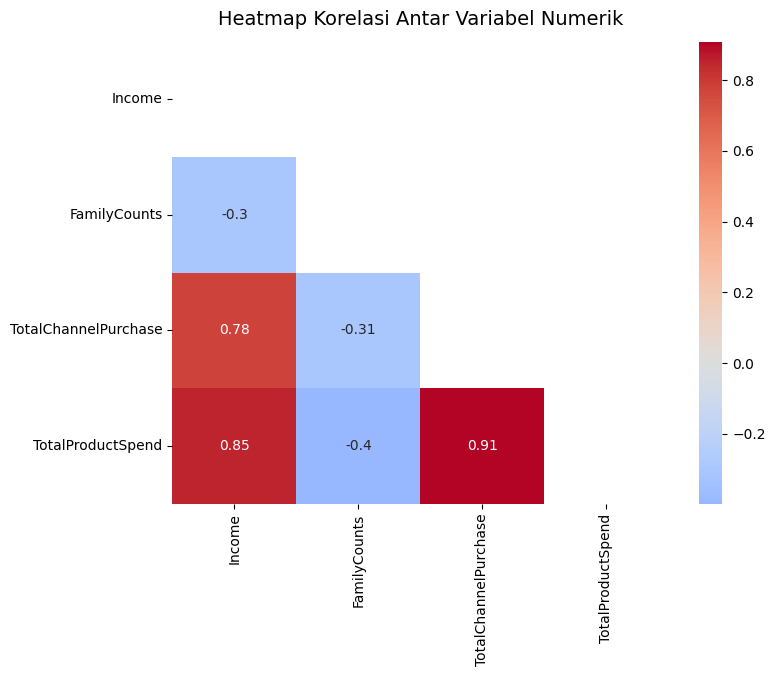

Matrix korelasi (Spearman) antar variable utama:


,Income,FamilyCounts,TotalChannelPurchase,TotalProductSpend
Income,1.000000,-0.300995,0.775523,0.848592
FamilyCounts,-0.300995,1.000000,-0.310640,-0.397487
TotalChannelPurchase,0.775523,-0.310640,1.000000,0.908407
TotalProductSpend,0.848592,-0.397487,0.908407,1.000000


In [167]:
# Correlation between main variables
num_cols = ['Income', 'FamilyCounts', 'TotalChannelPurchase', 'TotalProductSpend']
corr_matrix = df_clean[num_cols].corr(method='spearman')
matrix_triu = np.triu(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(data = corr_matrix,
            cmap = 'coolwarm',
            center = 0,
            annot = True,
            mask = matrix_triu)
plt.title("Heatmap Korelasi Antar Variabel Numerik", fontsize=14, pad=12)
plt.show()
print('Matrix korelasi (Spearman) antar variable utama:')
corr_matrix

Dari hasil analisa korelasi hubungan antar variabel numerik khususnya untuk `Income`, `FamilyCounts`, `TotalChannelPurchase`, `TotalProductSpend`, menunjukkan bahwa:
- `Income` berkorelasi sangat kuat dan positif dengan `TotalProductSpend` **(0.85)** serta `TotalChannelPurchase` **(0.78)** yang menunjukkan bahwa semakin tinggi pendapatan, semakin tinggi pula belanja dan jumlah pembelian customer.
- `TotalChannelPurchase` juga berkorelasi sangat kuat dengan `TotalProductSpend` **(0.91)** yang menunjukkan semakin sering membeli melalui berbagai channel, semakin tinggi pula total spending.
- `FamilyCounts` justru memiliki korelasi negatif dengan variabel lainnya (sekitar **-0.3** hingga **-0.4**) yang menunjukkan bahwa semakin banyak anggota keluarga, cenderung semakin rendah total spending dan pembelian channel.

Insight:
- `Income` sebagai driver utama spending --> customer dengan pendapatan lebih tinggi jelas menjadi target utama, karena pola belanja dan frekuensi pembelian meningkat seiring naiknya pendapatan.
- `Channel` sebagai penguat spending --> tingginya korelasi antara channel purchase dengan total spending menunjukkan efektivitas strategi multi-channel. Pelanggan yang lebih sering bertransaksi melalui channel tertentu juga memberikan kontribusi belanja yang lebih besar.
- `Family` perlu diperhatikan --> meskipun jumlah anggota keluarga lebih banyak, spending justru lebih rendah. Hal ini bisa mengindikasikan keterbatasan daya beli pada keluarga besar atau prioritas belanja berbeda.

#### **Summary**

1. Analisis Variabel Utama
    - `Total Spending`: Mayoritas customer belanja rendah–menengah, dengan segmen high spender menonjol.
    - `Income`: Distribusi cukup simetris, income tinggi cenderung meningkatkan total spending.
    - `Family Type`: Mayoritas Small Family; keluarga besar sedikit tapi berpotensi target promosi khusus.
    - `Channel Preference`: Store dominan, Catalog memiliki spending tertinggi dan konsisten; intensitas pembelian normal (median 12 transaksi).

2. Hubungan Awal Antar Variabel
    - `Income` vs `Total Spending`: Positif (Spearman **0.85**) menunjukkan income tinggi --> spending tinggi, tetapi ada variasi individual.
    - `Family Type` vs `Total Spending`: Negatif (Spearman **-0.40**) menunjukkan keluarga besar cenderung spending lebih rendah.
    - `Channel Preference` vs `Total Spending`: Positif (Spearman 0.91) menunjukkan intensitas pembelian tinggi berhubungan positif sangat kuat dengan spending dimana pada channel Catalog tertinggi, sedangkan Multi-channel cenderung rendah.

3. Korelasi Antar Variabel Numerik
    - `Income` --> `TotalProductSpend` **(0.85)** & `TotalChannelPurchase` **(0.78)**: positif kuat.
    - `TotalChannelPurchase` --> `TotalProductSpend` **(0.91)**: positif sangat kuat.
    - `FamilyCounts` --> variabel lainnya: negatif **(-0.3 hingga -0.4)**.

                   
**Insights:**
- `Income`: Driver utama total spending; high-income customer berkontribusi signifikan terhadap revenue --> target ideal untuk strategi premium marketing dan personalisasi produk.
- `Channel Preference`: Intensitas transaksi di channel tertentu (**Catalog** & **Store**) sangat memengaruhi total spending --> strategi omnichannel dan promosi cross-channel bisa meningkatkan revenue dan loyalitas high-value customer.
- `Family Size`: Ukuran keluarga berpengaruh negatif terhadap spending --> promosi dan penawaran produk harus disesuaikan: paket hemat untuk keluarga besar, promo convenience untuk keluarga kecil.

                  
Catatan Lanjutan:           
Income, channel preference, dan family size adalah faktor kritikal dalam memahami perilaku belanja. Insight ini bersifat awal dari EDA dan masih perlu analisis lanjutan, seperti:
- Segmentasi income & spending ratio
- Efek family type terhadap total spending
- Efektivitas channel
Analisis mendalam ini akan membantu menghasilkan strategi bisnis yang lebih terukur dan actionable, berdasarkan insight awal dari EDA.

### **Faktor Pengaruh Spending Customer**

Setelah mendapatkan insight awal dari EDA, bagian ini bertujuan untuk mendalami faktor-faktor yang memengaruhi total spending customer. Fokus analisis adalah pada tiga karakteristik utama: `Income`, `Family Type`, dan `Channel Preference`. Tujuan utamanya adalah:
- Mengevaluasi hubungan `Income` dengan `Total Spending` dan mengidentifikasi segmen high-income yang efisien dalam belanja.
- Mengidentifikasi pengaruh `Family Type` terhadap `Total Spending`, termasuk efektivitas belanja per anggota keluarga.
- Mengukur kontribusi `Channel Preference` terhadap `Total Spending` customer melalui frekuensi pembelian dan proporsi belanja (***share of wallet***).

Bagian ini berfokus pada identifikasi faktor kunci yang memengaruhi total spending customer menggunakan statistik inferensial dan segmentasi. Dengan uji perbedaan antar segmen (misal ANOVA atau Kruskal-Wallis) serta analisis kontribusi channel, insight yang diperoleh dapat menunjukkan perbedaan signifikan antar grup dan menjadi dasar rekomendasi strategi marketing serta promosi yang lebih tepat sasaran dibandingkan sekadar EDA.

#### **Segmentasi Income & Spending Ratio**
Berdasarkan hasil EDA, terlihat hubungan positif kuat antara Income dan Total Spending **(Spearman 0.85)**, di mana customer dengan income tinggi cenderung memiliki spending lebih tinggi. Untuk lebih memahami proporsi belanja customer terhadap income dan variasinya antar segmen, perlu dilakukan analisis mendalam berupa segmentasi income dan perhitungan spending ratio. Analisis ini memungkinkan identifikasi high-income low-spender maupun low-income high-spender yang tidak terlihat hanya dari EDA.

**Tujuan:** Mengevaluasi proporsi spending terhadap income (spending ratio) dan mengelompokkan customer berdasarkan segmen income (Low / Medium / High) untuk strategi marketing yang lebih terarah.

**Hipotesis:**
- Ho: Tidak ada perbedaan spending ratio antara segmen income (Mean spending ratio pada **Low Income** = **Medium Income** = **High Income**)
- Ha: Ada perbedaan spending ratio antar segmen income (Mean spending ratio pada **Low Income** = **Medium Income** ≠ **High Income**)

Penambahan kolom `Income Segment` dan `Spending Ratio` untuk analisis inferensial dan segmentasi
- Berdasarkan hasil EDA, mayoritas customer berada di kisaran pendapatan menengah **(35,000–68,000)**, dengan sebagian kecil low dan high income. Untuk analisis mendalam, pendapatan dibagi menjadi tiga segmen: **Low (≤40,000)**, **Medium (40,001–80,000)**, dan **High (>80,000)**. Batasan ini dipilih agar realistis secara bisnis dan memudahkan perbandingan total spending antar segmen.
- Perhitungan Spending Ratio adalah `Total Spending` dibagi `Income`
- Distribusi dasar dari variabel penyusunnya (`Income` dan `Total Spending`) sudah dianalisis di EDA awal, sehingga tidak diperlukan EDA terpisah untuk kolom ini.

In [168]:
income_segment = np.where(df_clean['Income'] <= 40000, 'Low',
                    np.where(df_clean['Income'] <= 80000, 'Medium', 'High'))
ratio = df_clean['TotalProductSpend'] / df_clean['Income']
df_clean.insert(5, 'IncomeSegment', income_segment)
df_clean.insert(6, 'SpendingRatio', ratio)
display(df_clean, df_clean.groupby(by='IncomeSegment')[['IncomeSegment']].count())

,ID,Year_Birth,Education,Marital_Status,Income,IncomeSegment,SpendingRatio,Kidhome,Teenhome,FamilyCounts,FamilyType,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalProductSpend,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalChannelPurchase,PreferredChannel,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single/Alone,58138.0,Medium,0.027813,0,0,1,No Kid,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,Catalog,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single/Alone,46344.0,Medium,0.000583,1,1,3,Small Family,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,Store,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Married/Partner,71613.0,Medium,0.010836,0,0,2,No Kid,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,Store,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Married/Partner,26646.0,Low,0.001989,1,0,3,Small Family,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,Store,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married/Partner,58293.0,Medium,0.007239,1,0,3,Small Family,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,Store,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married/Partner,61223.0,Medium,0.021904,0,1,3,Small Family,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,Web,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Married/Partner,64014.0,Medium,0.006936,2,1,5,Large Family,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,15,Web,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced/Widow,56981.0,Medium,0.021779,0,0,1,No Kid,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,Store,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Married/Partner,69245.0,Medium,0.012174,0,1,3,Small Family,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,Store,3,0,0,0,0,0,0,0


,IncomeSegment
IncomeSegment,
High,216
Low,732
Medium,1287


In [169]:
normal = True
for segment in df_clean['IncomeSegment'].unique():
    stat, p = shapiro(df_clean[df_clean['IncomeSegment'] == segment]['SpendingRatio'])
    if p <= 0.05:
        normal = False
    print(f"Income Segment = {segment} | p-value = {p} ({p:.4f})")

groups = [df_clean[df_clean['IncomeSegment'] == seg]['SpendingRatio'] for seg in df_clean['IncomeSegment'].unique()]
if normal:
    stat, p_value = f_oneway(*groups)
    print('\nUji normalitas keseluruhan kategori data Income Segment menunjukkan hasil normal, sehinggan metode yang digunakan untuk hypothesis testing adalah ANOVA')
    print(f"ANOVA Test: p-value = {p_value} ({p_value:.4f})")
else:
    stat, p_value = kruskal(*groups)
    print('\nUji normalitas keseluruhan kategori data Income Segment menunjukkan terdapat group kategori yang tidak normal, sehinggan metode yang digunakan untuk hypothesis testing adalah Kruskal-Wallis')
    print(f"Kruskal-Wallis Test: p-value = {p_value} ({p_value:.4f})")

if p_value >= 0.05:
    # Ho
    print(f'''\nNilai p-value = {p_value} ({p_value:.4f}). Menunjukkan pvalue > 0.05. Gagal menolak Ho.
Tidak terdapat cukup bukti bahwa rata-rata spending ratio pada segment Low Income tidak sama dengan
rata-rata spending ratio pada segment Middle Income dan dengan rata-rata spending ratio pada segment High Income.
(Rata-rata spending ratio pada segment Low Income dan Middle Income dan High Income tidak berbeda signinfikan)''')

else:
    # Ha
    print(f'''\nNilai p-value = {p_value} ({p_value:.4f}). Menunjukkan pvalue < 0.05. Berhasil menolak Ho.
Terdapat cukup bukti bahwa rata-rata spending ratio pada segment Low Income tidak sama dengan
rata-rata spending ratio pada segment Middle Income dan dengan rata-rata spending ratio pada segment High Income.
(Rata-rata spending ratio pada segment Low Income dan Middle Income dan High Income berbeda signinfikan)''')

Income Segment = Medium | p-value = 1.5246337843262767e-15 (0.0000)
Income Segment = Low | p-value = 1.5343624233773682e-50 (0.0000)
Income Segment = High | p-value = 0.000412502829568818 (0.0004)

Uji normalitas keseluruhan kategori data Income Segment menunjukkan terdapat group kategori yang tidak normal, sehinggan metode yang digunakan untuk hypothesis testing adalah Kruskal-Wallis
Kruskal-Wallis Test: p-value = 2.2146376204100605e-184 (0.0000)

Nilai p-value = 2.2146376204100605e-184 (0.0000). Menunjukkan pvalue < 0.05. Berhasil menolak Ho.
Terdapat cukup bukti bahwa rata-rata spending ratio pada segment Low Income tidak sama dengan
rata-rata spending ratio pada segment Middle Income dan dengan rata-rata spending ratio pada segment High Income.
(Rata-rata spending ratio pada segment Low Income dan Middle Income dan High Income berbeda signinfikan)


Berdasarkan hasil uji hipotesis di atas, terlihat bahwa rata-rata Spending Ratio antar customer dengan `Low Income`, `Medium Income`, dan `High Income` berbeda secara signifikan. Hal ini menunjukkan bahwa segmen income memang memengaruhi perilaku spending customer, dengan beberapa segmen memiliki pengaruh lebih besar terhadap total spending dibanding segmen lainnya. Distribusi spending per segmen income dapat dilihat lebih jelas pada visualisasi berikut.

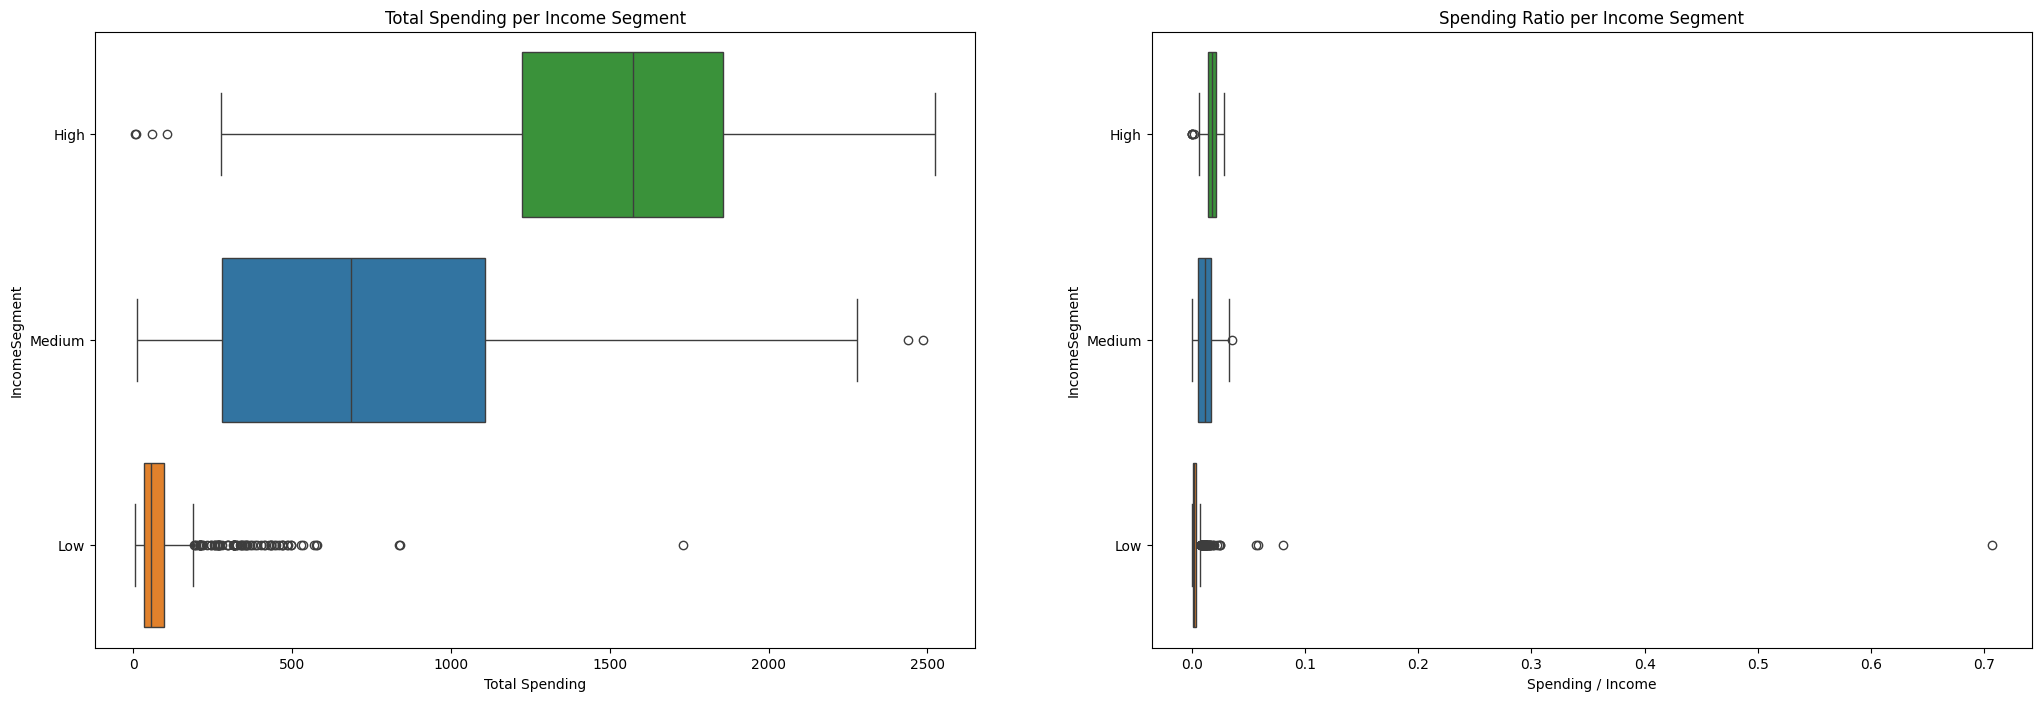

Tabel Deskriptif Total Spending per Income Segment


,count,mean,std,min,25%,50%,75%,max
IncomeSegment,,,,,,,,
High,216.0,1516.476852,466.189132,6.0,1222.75,1573.0,1855.25,2525.0
Low,732.0,93.849727,122.447697,5.0,34.00,55.0,96.00,1730.0
Medium,1287.0,743.928516,527.482273,13.0,278.50,685.0,1107.50,2486.0


Tabel Deskriptif Spending Ratio per Income Segment


,count,mean,std,min,25%,50%,75%,max
IncomeSegment,,,,,,,,
High,216.0,0.017566,0.005422,0.000039,0.014246,0.018321,0.021618,0.028787
Low,732.0,0.004488,0.026535,0.000231,0.001252,0.002135,0.003911,0.706988
Medium,1287.0,0.011701,0.007340,0.000294,0.005523,0.011454,0.017055,0.035312


In [170]:
fig, axes = plt.subplots(1,2, figsize=(25,8))
p1 = sns.boxplot(data = df_clean,
            x = 'TotalProductSpend',
            y = 'IncomeSegment',
            hue = 'IncomeSegment',
            order = ['High','Medium','Low'],
            ax = axes[0])
p2 = sns.boxplot(data = df_clean,
            x = 'SpendingRatio',
            y = 'IncomeSegment',
            hue = 'IncomeSegment',
            order = ['High','Medium','Low'],
            ax = axes[1])
axes[0].set_title('Total Spending per Income Segment')
axes[0].set_xlabel('Total Spending')
axes[1].set_title('Spending Ratio per Income Segment')
axes[1].set_xlabel('Spending / Income')

plt.show()
print('Tabel Deskriptif Total Spending per Income Segment')
display(df_clean.groupby('IncomeSegment')['TotalProductSpend'].describe())
print('Tabel Deskriptif Spending Ratio per Income Segment')
display(df_clean.groupby('IncomeSegment')['SpendingRatio'].describe())

Berdasarkan hasil analisa distribusi spending antar segmen income, terlihat bahwa customer dengan `High Income` cenderung memiliki total spending yang tinggi, dengan rata-rata sebesar **1,516**, sedangkan customer dengan `Low Income` umumnya memiliki total spending rendah, rata-rata **93**. Pola ini memang sesuai dengan yang diharapkan secara umum.

Namun, jika dilihat dari `Spending Ratio` (persentase pengeluaran terhadap income), terdapat beberapa customer dengan `High Income` yang pengeluarannya jauh di bawah rata-rata rasio kelompok `High Income`. Sebaliknya, ada juga customer dengan `Low Income` yang pengeluarannya justru jauh melebihi rata-rata rasio kelompok `Low Income`.

Fenomena ini menunjukkan adanya dua kelompok customer yang menyimpang dari pola umum, yang bisa menjadi insight penting untuk meningkatkan spending di supermarket, yaitu: **High-Income Low-Spender** dan **Low-Income High-Spender**

In [171]:
high_income_low_spender = df_clean[
    (df_clean["Income"] > df_clean["Income"].median()) &
    (df_clean["SpendingRatio"] < df_clean["SpendingRatio"].median())
]

low_income_high_spender = df_clean[
    (df_clean["Income"] < df_clean["Income"].median()) &
    (df_clean["SpendingRatio"] > df_clean["SpendingRatio"].median())
]

print("High-Income Low-Spender:")
display(high_income_low_spender[["Income", "TotalProductSpend", "SpendingRatio"]].sort_values(by='Income', ascending=False))

print("\nLow-Income High-Spender:")
display(low_income_high_spender[["Income", "TotalProductSpend", "SpendingRatio"]].sort_values(by='Income'))

High-Income Low-Spender:


,Income,TotalProductSpend,SpendingRatio
617,162397.0000,107,0.000659
1300,157733.0000,59,0.000374
2132,156924.0000,8,0.000051
655,153924.0000,6,0.000039
1898,113734.0000,277,0.002436
...,...,...,...
1383,51969.8614,21,0.000404
1335,51948.0000,311,0.005987
1445,51876.0000,310,0.005976
97,51813.0000,63,0.001216



Low-Income High-Spender:


,Income,TotalProductSpend,SpendingRatio
21,2447.0,1730,0.706988
1975,4428.0,359,0.081075
9,5648.0,49,0.008676
1328,6560.0,373,0.056860
774,6835.0,137,0.020044
...,...,...,...
437,51529.0,467,0.009063
227,51537.0,1103,0.021402
945,51563.0,1250,0.024242
1753,51569.0,467,0.009056


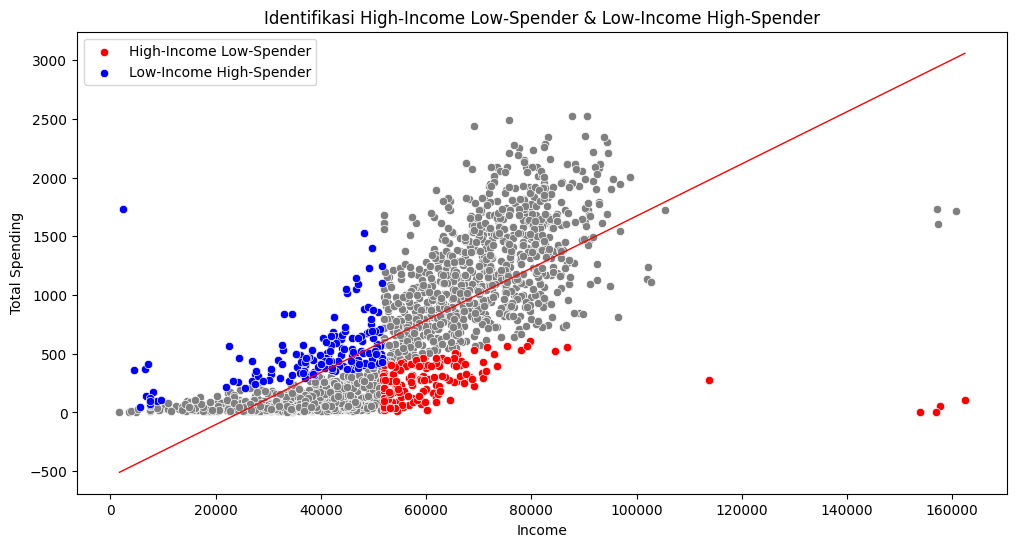

In [172]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_clean,
                x = "Income",
                y = "TotalProductSpend",
                color = "gray")

sns.scatterplot(data = high_income_low_spender,
                x = "Income",
                y = "TotalProductSpend",
                color = "red",
                label = 'High-Income Low-Spender')

sns.scatterplot(data = low_income_high_spender,
                x = "Income",
                y = "TotalProductSpend",
                color = "blue",
                label = 'Low-Income High-Spender')

sns.regplot(data = df_clean, x='Income', y='TotalProductSpend',
            scatter=False, color='red', line_kws={"linewidth":1},ci=0)

plt.title("Identifikasi High-Income Low-Spender & Low-Income High-Spender")
plt.ylabel('Total Spending')
plt.show()

Hasil analisa mendalam terhadap `Segmen Income` dan `Spending Ratio`, menunjukkan bahwa:
- **Segmentasi Income:**           
`High Income` terdiri dari **216** customer, `Medium Income` **1,287** customer, dan `Low Income` **732** customer.

- **Uji Hipotesis (Kruskal-Wallis Test):**              
P-value ≈ 0.00 berhasil menolak Ho, sehingga terdapat perbedaan signifikan rata-rata spending ratio antar segment income (Low, Medium, High).

- **Statistik Deskriptif Total Spending per Segment:**             
Rata-rata total spending cenderung meningkat seiring income. `High Income` memiliki rata-rata 1,516, median 1,573, maksimal 2,525. `Medium Income` rata-rata 744, median 685, maksimal 2,486. `Low Income` rata-rata 94, median 55, maksimal 1,730, namun beberapa customer `Low Income` memiliki spending yang tinggi (outlier).

- **Statistik Deskriptif Spending Ratio per Segment:**              
`High Income` customer rata-rata membelanjakan persentase kecil dari income-nya (rata-rata **0,0176**), `Medium Income` **0,0117**, sedangkan `Low Income` rata-rata **0,0045**, namun ada outlier hingga **0,707**. Hal ini menunjukkan adanya Low-Income High-Spender.

- **Identifikasi Customer Spesial:**                 
`High-Income Low-Spender` ada **184** customer (spending ratio sangat rendah, meski income tinggi) dan `Low-Income High-Spender` ada **185** customer (spending ratio tinggi, meski income rendah). Scatterplot menunjukkan kedua kelompok ini berada di luar tren umum (di bawah/di atas garis tren).


**Insight:**          
Dari analisa ini terlihat ada dua kelompok customer yang menyimpang dari perilaku belanja yang seharusnya, yaitu `High-Income Low-Spender` dan `Low-Income High-Spender`. `High-Income Low-Spender` cenderung membelanjakan persentase kecil dari income mereka, sehingga ada potensi untuk strategi upselling atau promosi produk premium, karena mereka mampu membeli produk bernilai tinggi tetapi saat ini belum memaksimalkan belanja. Sebaliknya, `Low-Income High-Spender` membelanjakan porsi besar dari income, sehingga mereka bisa menjadi target program diskon, voucher, atau reward loyalitas, karena mereka termasuk value customer yang berpotensi memberikan kontribusi belanja yang tinggi dibanding rata-rata customer berpenghasilan rendah.

#### **Efek Family Type terhadap Spending**

Dari EDA terlihat bahwa **Small Family** memiliki spending lebih tinggi, sedangkan **Large Family** lebih rendah **(Spearman -0.40)**, menunjukkan adanya pengaruh ukuran keluarga terhadap perilaku belanja. Analisis mendalam diperlukan untuk mengkonfirmasi perbedaan ini secara statistik dan melihat efisiensi belanja per anggota keluarga.

**Tujuan:** Menguji perbedaan total spending antar tipe keluarga dan menganalisis spending per anggota keluarga untuk merancang promosi atau paket produk yang disesuaikan dengan tipe keluarga.

**Hipotesis**
- Ho: Tidak ada perbedaan signifikan total spending antar tipe keluarga (Mean Total Spending pada **No Kid** = **Small Family** = **Large Family**)
- Ha: Ada perbedaan signifikan total spending antar tipe keluarga (Mean Total Spending pada **No Kid** = **Small Family** ≠ **Large Family**)

In [173]:
normal = True
for ftype in df_clean['FamilyType'].unique():
    stat, p = shapiro(df_clean[df_clean['FamilyType'] == ftype]['TotalProductSpend'])
    if p <= 0.05:
        normal = False
    print(f"Family Type = {ftype} | p-value = {p} ({p:.4f})")

groups = [df_clean[df_clean['FamilyType'] == famtype]['TotalProductSpend'] for famtype in df_clean['FamilyType'].unique()]
if normal:
    stat, p_value = f_oneway(*groups)
    print('\nUji normalitas keseluruhan kategori data Family Type menunjukkan hasil normal, sehinggan metode yang digunakan untuk hypothesis testing adalah ANOVA')
    print(f"ANOVA Test: p-value = {p_value} ({p_value:.4f})")
else:
    stat, p_value = kruskal(*groups)
    print('\nUji normalitas keseluruhan kategori data Family Type menunjukkan terdapat group kategori yang tidak normal, sehinggan metode yang digunakan untuk hypothesis testing adalah Kruskal-Wallis')
    print(f"Kruskal-Wallis Test: p-value = {p_value} ({p_value:.4f})")

if p_value >= 0.05:
    # Ho
    print(f'''\nNilai p-value = {p_value} ({p_value:.4f}). Menunjukkan pvalue > 0.05. Gagal menolak Ho.
Tidak terdapat cukup bukti bahwa rata-rata total spending pada family type No Kid tidak sama dengan
rata-rata total spending pada family type Small Family dan dengan rata-rata total spending pada family type Large Family.
(Rata-rata total spending pada family type No Kid dan Small Family dan Large Family tidak berbeda signinfikan)''')

else:
    # Ha
    print(f'''\nNilai p-value = {p_value} ({p_value:.4f}). Menunjukkan pvalue < 0.05. Berhasil menolak Ho.
Terdapat cukup bukti bahwa rata-rata total spending pada family type No Kid tidak sama dengan rata-rata 
total spending pada family type Small Family dan dengan rata-rata total spending pada family type Large Family.
(Rata-rata total spending pada family type No Kid dan Small Family dan Large Family berbeda signinfikan)''')

Family Type = No Kid | p-value = 4.4830890566773913e-13 (0.0000)
Family Type = Small Family | p-value = 2.187300337977391e-38 (0.0000)
Family Type = Large Family | p-value = 6.841016737818434e-10 (0.0000)

Uji normalitas keseluruhan kategori data Family Type menunjukkan terdapat group kategori yang tidak normal, sehinggan metode yang digunakan untuk hypothesis testing adalah Kruskal-Wallis
Kruskal-Wallis Test: p-value = 3.081592392581961e-107 (0.0000)

Nilai p-value = 3.081592392581961e-107 (0.0000). Menunjukkan pvalue < 0.05. Berhasil menolak Ho.
Terdapat cukup bukti bahwa rata-rata total spending pada family type No Kid tidak sama dengan rata-rata 
total spending pada family type Small Family dan dengan rata-rata total spending pada family type Large Family.
(Rata-rata total spending pada family type No Kid dan Small Family dan Large Family berbeda signinfikan)


Berdasarkan hasil uji hipotesis di atas, terlihat bahwa rata-rata Spending Ratio antar Family Type `No Kid`, `Small Kid`, dan `Large Kid` berbeda secara signifikan. Hal ini menunjukkan bahwa family type memang memengaruhi perilaku spending customer, dengan beberapa kelompok memiliki pengaruh lebih besar terhadap total spending dibanding kelompok lainnya. Distribusi spending per kelompok Family Type dapat dilihat lebih jelas pada visualisasi berikut.

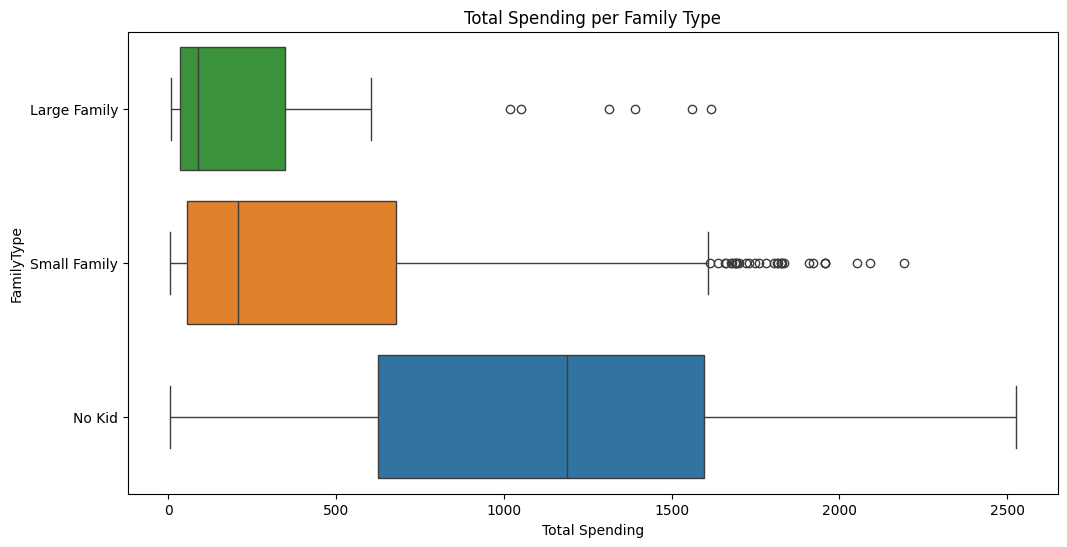

Tabel Deskriptif Total Spending per Family Type


,TotalProductSpend,Percentage
FamilyType,,
Large Family,14554,1.075133
No Kid,703262,51.951366
Small Family,635877,46.973501


,count,mean,std,min,25%,50%,75%,max
FamilyType,,,,,,,,
Large Family,53.0,274.603774,414.277051,8.0,35.00,88.0,348.00,1616.0
No Kid,636.0,1105.757862,645.996759,6.0,625.75,1189.5,1597.25,2525.0
Small Family,1546.0,411.304657,450.714100,5.0,55.00,208.0,678.50,2194.0


In [174]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df_clean,
            x = 'TotalProductSpend',
            y = 'FamilyType',
            hue = 'FamilyType',
            order = ['Large Family','Small Family','No Kid'])
plt.title('Total Spending per Family Type')
plt.xlabel('Total Spending')
plt.show()

family_spend = df_clean.groupby('FamilyType')[['TotalProductSpend']].sum()
family_spend['Percentage'] = (family_spend['TotalProductSpend'] / family_spend['TotalProductSpend'].sum()) * 100

print('Tabel Deskriptif Total Spending per Family Type')
display(family_spend)
display(df_clean.groupby('FamilyType')['TotalProductSpend'].describe())

Berdasarkan hasil analisa distribusi spending antar segmen keluarga, terlihat bahwa customer dengan `No Kid` cenderung memiliki rata-rata spending lebih tinggi dibanding `Small Family` maupun `Large Kid`. Namun, distribusi data juga menunjukkan adanya outliers signifikan, baik pada kelompok `Large Family` dan `Small Family`, di mana beberapa customer membelanjakan jauh lebih tinggi dibanding rata-rata segmennya. Fenomena ini menunjukkan adanya kelompok khusus yang menyimpang dari pola umum dan berpotensi menjadi niche yang bernilai, yaitu **Large Family High-Spender** serta **Small Family High-Spender**, yang dapat menjadi target promosi atau strategi loyalitas khusus supermarket.

In [175]:
ftype = ['Large Family','Small Family']

for ft in ftype:
    q1 = df_clean[df_clean['FamilyType'] == ft]['TotalProductSpend'].describe()['25%']
    q3 = df_clean[df_clean['FamilyType'] == ft]['TotalProductSpend'].describe()['75%']
    iqr = q3 - q1

    if ft == 'Large Family':
        lf_upper = q3 + 1.5 * iqr
    elif ft == 'Small Family':
        sf_upper = q3 + 1.5 * iqr

large_family_high_spender = df_clean[
    (df_clean["FamilyType"] == 'Large Family') &
    (df_clean["TotalProductSpend"] > lf_upper)
]
small_family_high_spender = df_clean[
    (df_clean["FamilyType"] == 'Small Family') &
    (df_clean["TotalProductSpend"] > sf_upper)
]

print(f"""Large Family High-Spender
Jumlah High Spender: {len(large_family_high_spender)}""")
display(large_family_high_spender[["Marital_Status","FamilyType", "FamilyCounts", "TotalProductSpend"]].sort_values(by='TotalProductSpend', ascending=False))

print(f"""\nSmall Family High-Spender
Jumlah High Spender: {len(small_family_high_spender)}""")
display(small_family_high_spender[["Marital_Status","FamilyType", "FamilyCounts", "TotalProductSpend"]].sort_values(by='TotalProductSpend', ascending=False))

Large Family High-Spender
Jumlah High Spender: 6


,Marital_Status,FamilyType,FamilyCounts,TotalProductSpend
826,Married/Partner,Large Family,5,1616
69,Married/Partner,Large Family,5,1562
2041,Single/Alone,Large Family,4,1392
1022,Married/Partner,Large Family,5,1314
319,Single/Alone,Large Family,4,1052
1569,Married/Partner,Large Family,5,1019



Small Family High-Spender
Jumlah High Spender: 31


,Marital_Status,FamilyType,FamilyCounts,TotalProductSpend
1010,Married/Partner,Small Family,3,2194
490,Married/Partner,Small Family,3,2092
2098,Married/Partner,Small Family,3,2053
824,Married/Partner,Small Family,3,1957
559,Married/Partner,Small Family,3,1957
1133,Married/Partner,Small Family,3,1956
1801,Married/Partner,Small Family,3,1921
1488,Married/Partner,Small Family,3,1910
175,Married/Partner,Small Family,3,1835
937,Married/Partner,Small Family,3,1829


Hasil analisa mendalam terhadap Efek `Family Type` terhadap `Total Spending`, menunjukkan bahwa:
- **Segmentasi Family Type:**
`No Kid` terdiri dari **636** customer, `Small Family` **1,546** customer, dan `Large Family` **53** customer.

- **Uji Hipotesis (Kruskal-Wallis Test):**
P-value ≈ 0.00 berhasil menolak Ho, sehingga terdapat perbedaan signifikan rata-rata total spending antar Family Type (No Kid, Small Family, Large Family).

- **Statistik Deskriptif Total Spending per Family Type:**
Rata-rata total spending tertinggi dimiliki oleh `No Kid` (1,105.76, **median 1,189.5**, maksimal 2,525), diikuti `Small Family` (411.30, **median 208**, maksimal 2,194), dan `Large Family` (274.60, **median 88**, maksimal 1,616). Boxplot menunjukkan adanya outlier, terutama pada Small Family dan Large Family, yang menunjukkan adanya customer dengan pengeluaran jauh di atas median kelompoknya.

- **Identifikasi Customer Spesial (High Spender):**
High Spender berada jauh di atas median pada `Small Family` dan `Large Family`. **Large Family High Spender**: 6 customer, **Small Family High Spender**: 31 customer. Data ini membantu mengidentifikasi target marketing spesifik di tiap Family Type.

**Insight:**
Analisa ini menunjukkan bahwa perilaku belanja berbeda antar tipe keluarga. Customer `No Kid` cenderung memiliki total pengeluaran yang tinggi, sementara customer `Small Family` berada pada tingkat pengeluaran menengah, dan customer `Large Family` memiliki pengeluaran lebih rendah. Namun, analisa lebih lanjut mengungkapkan adanya kelompok **High Spender** pada segmen `Small Family` dan `Large Family`. Temuan ini menjadi peluang strategis bagi Supermarket untuk mengarahkan program loyalitas dan promosi bernilai tinggi secara lebih tepat sasaran. Dengan adanya program loyalitas ini, diharapkan dapat menarik lebih banyak customer serta meningkatkan penjualan, khususnya bagi segmen `Small Family` dan `Large Family`.

#### **Efektivitas Channel (Channel Effectiveness)**

EDA menunjukkan Store sebagai channel dominan dan Catalog memiliki rata-rata spending tertinggi, sementara Web dan Multi-channel lebih rendah. Untuk mengetahui channel mana yang benar-benar efektif mendorong total spending, analisis mendalam diperlukan untuk mengukur kontribusi tiap channel dan efektivitasnya secara kuantitatif, melebihi sekadar pola deskriptif yang diperoleh dari EDA.

**Tujuan:** Mengevaluasi efektivitas setiap channel dalam mendorong total spending customer dengan menghitung ***share of wallet*** per channel dan membandingkan rata-rata kontribusinya, untuk menentukan fokus promosi dan peningkatan revenue.

**Hipotesis**
- Ho: Tidak ada perbedaan signifikan total spending antar channel (Mean Total Spending pada **Store** = **Catalog** = **Web**)
- Ha: Ada perbedaan signifikan total spending antar channel (Mean Total Spending pada **Store** = **Catalog** ≠ **Web**)

Penambahan kolom `Purchase Share` untuk analisis efektivitas channel:
- Kolom `Purchase Share` dihitung sebagai proporsi pembelian per channel terhadap `Total Channel Purchase` setiap customer. Hal ini memungkinkan evaluasi kontribusi relatif tiap channel, bukan hanya nilai absolutnya.
- Dengan adanya `Purchase Share`, analisis mendalam dapat mengidentifikasi channel dominan pada level customer maupun agregat, serta mendukung pembuatan variabel turunan seperti Preferred Channel.

In [176]:
df_clean.insert(22,'PS_Web',df_clean['NumWebPurchases'] / df_clean['TotalChannelPurchase'])
df_clean.insert(24,'PS_Catalog',df_clean['NumCatalogPurchases'] / df_clean['TotalChannelPurchase'])
df_clean.insert(26,'PS_Store',df_clean['NumStorePurchases'] / df_clean['TotalChannelPurchase'])

total_purchases = df_clean[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()
total_purchases.index = ['Web','Catalog','Store']
total_share_purchase = total_purchases / total_purchases.sum()

summary_ch = pd.DataFrame({
    "Total Purchase": total_purchases,
    "Purchase Share": total_share_purchase
}).reset_index().rename(columns={"index": "Channel"})

display(df_clean,summary_ch)

,ID,Year_Birth,Education,Marital_Status,Income,IncomeSegment,SpendingRatio,Kidhome,Teenhome,FamilyCounts,FamilyType,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalProductSpend,NumDealsPurchases,NumWebPurchases,PS_Web,NumCatalogPurchases,PS_Catalog,NumStorePurchases,PS_Store,TotalChannelPurchase,PreferredChannel,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single/Alone,58138.0,Medium,0.027813,0,0,1,No Kid,2012-09-04,58,635,88,546,172,88,88,1617,3,8,0.363636,10,0.454545,4,0.181818,22,Catalog,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single/Alone,46344.0,Medium,0.000583,1,1,3,Small Family,2014-03-08,38,11,1,6,2,1,6,27,2,1,0.250000,1,0.250000,2,0.500000,4,Store,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Married/Partner,71613.0,Medium,0.010836,0,0,2,No Kid,2013-08-21,26,426,49,127,111,21,42,776,1,8,0.400000,2,0.100000,10,0.500000,20,Store,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Married/Partner,26646.0,Low,0.001989,1,0,3,Small Family,2014-02-10,26,11,4,20,10,3,5,53,2,2,0.333333,0,0.000000,4,0.666667,6,Store,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married/Partner,58293.0,Medium,0.007239,1,0,3,Small Family,2014-01-19,94,173,43,118,46,27,15,422,5,5,0.357143,3,0.214286,6,0.428571,14,Store,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married/Partner,61223.0,Medium,0.021904,0,1,3,Small Family,2013-06-13,46,709,43,182,42,118,247,1341,2,9,0.562500,3,0.187500,4,0.250000,16,Web,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Married/Partner,64014.0,Medium,0.006936,2,1,5,Large Family,2014-06-10,56,406,0,30,0,0,8,444,7,8,0.533333,2,0.133333,5,0.333333,15,Web,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced/Widow,56981.0,Medium,0.021779,0,0,1,No Kid,2014-01-25,91,908,48,217,32,12,24,1241,1,2,0.111111,3,0.166667,13,0.722222,18,Store,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Married/Partner,69245.0,Medium,0.012174,0,1,3,Small Family,2014-01-24,8,428,30,214,80,30,61,843,2,6,0.285714,5,0.238095,10,0.476190,21,Store,3,0,0,0,0,0,0,0


,Channel,Total Purchase,Purchase Share
0,Web,9126,0.325777
1,Catalog,5945,0.212223
2,Store,12942,0.462000


In [177]:
channel = {'Web':'NumWebPurchases','Catalog':'NumCatalogPurchases','Store':'NumStorePurchases'}
normal = True
for name, ch in channel.items():
    stat, p = shapiro(df_clean[ch])
    if p <= 0.05:
        normal = False
    print(f"Channel = {name} | p-value = {p} ({p:.4f})")


web = df_clean['NumWebPurchases']
catalog = df_clean['NumCatalogPurchases']
store = df_clean['NumStorePurchases']
if normal:
    stat, p_value = f_oneway(web, catalog, store)
    print('\nUji normalitas keseluruhan kategori data Channel menunjukkan hasil normal, sehinggan metode yang digunakan untuk hypothesis testing adalah ANOVA')
    print(f"ANOVA Test: p-value = {p_value} ({p_value:.4f})")
else:
    stat, p_value = kruskal(*groups)
    print('\nUji normalitas keseluruhan kategori data Channel menunjukkan terdapat group kategori yang tidak normal, sehinggan metode yang digunakan untuk hypothesis testing adalah Kruskal-Wallis')
    print(f"Kruskal-Wallis Test: p-value = {p_value} ({p_value:.4f})")

if p_value >= 0.05:
    # Ho
    print(f'''\nNilai p-value = {p_value} ({p_value:.4f}). Menunjukkan pvalue > 0.05. Gagal menolak Ho.
Tidak terdapat cukup bukti bahwa rata-rata total spending pada channel Web tidak sama dengan
rata-rata total spending pada segment Catalog dan dengan rata-rata total spending pada segment Store.
(Rata-rata spending ratio pada channel Web dan Catalog dan Store tidak berbeda signinfikan)''')

else:
    # Ha
    print(f'''\nNilai p-value = {p_value} ({p_value:.4f}). Menunjukkan pvalue < 0.05. Berhasil menolak Ho.
Terdapat cukup bukti bahwa rata-rata total spending pada channel Web tidak sama dengan
rata-rata total spending pada segment Catalog dan dengan rata-rata total spending pada segment Store.
(Rata-rata spending ratio pada channel Web dan Catalog dan Store berbeda signinfikan)''')

Channel = Web | p-value = 3.11575849926967e-36 (0.0000)
Channel = Catalog | p-value = 5.250419425241013e-45 (0.0000)
Channel = Store | p-value = 2.560468053705054e-35 (0.0000)

Uji normalitas keseluruhan kategori data Channel menunjukkan terdapat group kategori yang tidak normal, sehinggan metode yang digunakan untuk hypothesis testing adalah Kruskal-Wallis
Kruskal-Wallis Test: p-value = 3.081592392581961e-107 (0.0000)

Nilai p-value = 3.081592392581961e-107 (0.0000). Menunjukkan pvalue < 0.05. Berhasil menolak Ho.
Terdapat cukup bukti bahwa rata-rata total spending pada channel Web tidak sama dengan
rata-rata total spending pada segment Catalog dan dengan rata-rata total spending pada segment Store.
(Rata-rata spending ratio pada channel Web dan Catalog dan Store berbeda signinfikan)


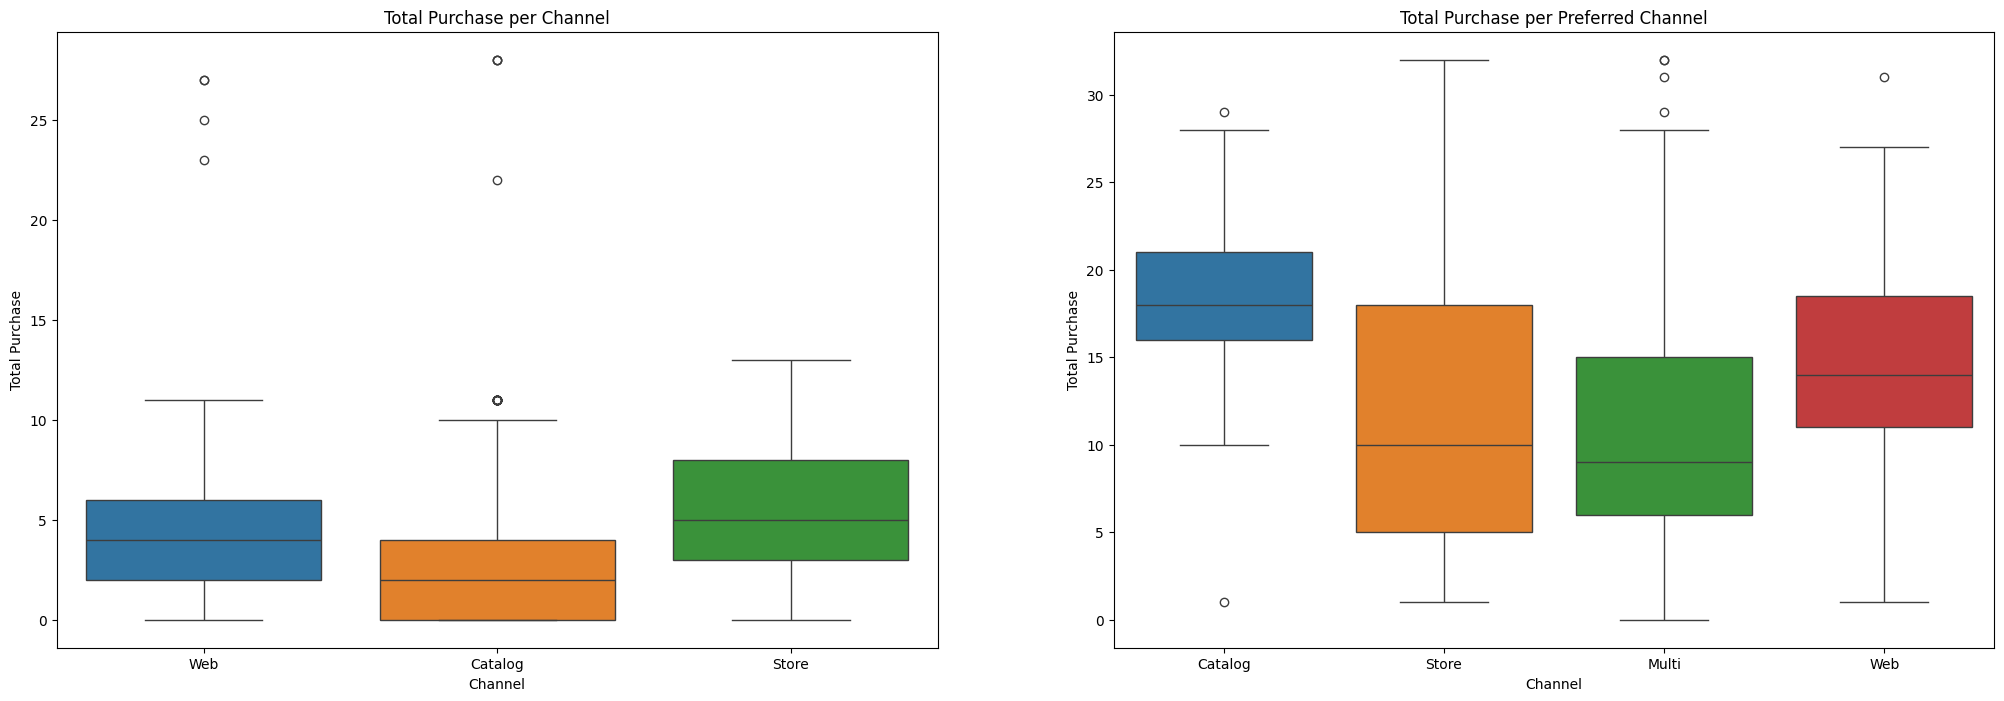

Tabel Deskriptif Total Purchase per Channel


,count,mean,std,min,25%,50%,75%,max
NumWebPurchases,2235.0,4.083221,2.780264,0.0,2.0,4.0,6.0,27.0
NumCatalogPurchases,2235.0,2.659955,2.921195,0.0,0.0,2.0,4.0,28.0
NumStorePurchases,2235.0,5.790604,3.253949,0.0,3.0,5.0,8.0,13.0


Tabel Deskriptif Total Purchase per Preferred Channel


,count,mean,std,min,25%,50%,75%,max
PreferredChannel,,,,,,,,
Catalog,136.0,18.316176,4.243867,1.0,16.0,18.0,21.0,29.0
Multi,299.0,11.220736,6.658857,0.0,6.0,9.0,15.0,32.0
Store,1477.0,11.780636,7.536224,1.0,5.0,10.0,18.0,32.0
Web,323.0,14.758514,5.337423,1.0,11.0,14.0,18.5,31.0


In [178]:
df_tmp = pd.DataFrame({
    'Web': df_clean['NumWebPurchases'],
    'Catalog': df_clean['NumCatalogPurchases'],
    'Store': df_clean['NumStorePurchases']
})
fig, axes = plt.subplots(1,2, figsize=(25,8))
p1 = sns.boxplot(data = df_tmp,
            ax = axes[0])
p2 = sns.boxplot(data = df_clean,
            x = 'PreferredChannel',
            y = 'TotalChannelPurchase',
            hue = 'PreferredChannel',
            ax = axes[1])
axes[0].set_title('Total Purchase per Channel')
axes[0].set_xlabel('Channel')
axes[0].set_ylabel('Total Purchase')
axes[1].set_title('Total Purchase per Preferred Channel')
axes[1].set_xlabel('Channel')
axes[1].set_ylabel('Total Purchase')
plt.show()

channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
desc_table = df_clean[channels].describe().T
print('Tabel Deskriptif Total Purchase per Channel')
display(desc_table)
print('Tabel Deskriptif Total Purchase per Preferred Channel')
display(df_clean.groupby('PreferredChannel')['TotalChannelPurchase'].describe())

Jika dilihat dari distribusi jumlah user, baik pada level per `Channel` maupun `Preferred Channel`, terlihat bahwa `Store` mendominasi dengan jumlah pembelian yang paling banyak. Bahkan, pada rata-rata pembelian per `Channel`, `Store` juga mencatat angka relatif tinggi yaitu sekitar **5** kali pembelian per customer. Namun, temuan menarik muncul ketika melihat dari sisi `Preferred Channel`; meskipun `Store` tetap menjadi pilihan utama dari sisi volume, rata-rata pembelian justru lebih tinggi pada `Catalog`. Hal ini mengindikasikan bahwa meskipun jumlah pengguna `Catalog` lebih sedikit, mereka cenderung memiliki intensitas pembelian yang lebih tinggi dibanding pengguna channel lain.

Berdasarkan temuan ini, analisis berikutnya akan difokuskan pada proporsi customer dengan aktivitas tinggi (**high activity**) pada masing-masing `Channel` dan `Preferred Channel`, untuk memahami lebih dalam karakteristik `Channel` yang efektif mendorong pembelian intensif.

In [179]:
thresholds = {
    'NumWebPurchases': df_clean['NumWebPurchases'].quantile(0.75),
    'NumCatalogPurchases': df_clean['NumCatalogPurchases'].quantile(0.75),
    'NumStorePurchases': df_clean['NumStorePurchases'].quantile(0.75)
}

total_ch = df_clean[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
high_ch = pd.Series({
    'NumWebPurchases': df_clean.loc[df_clean['NumWebPurchases'] >= thresholds['NumWebPurchases'], 'NumWebPurchases'].sum(),
    'NumCatalogPurchases': df_clean.loc[df_clean['NumCatalogPurchases'] >= thresholds['NumCatalogPurchases'], 'NumCatalogPurchases'].sum(),
    'NumStorePurchases': df_clean.loc[df_clean['NumStorePurchases'] >= thresholds['NumStorePurchases'], 'NumStorePurchases'].sum()
})

proporsi_ch = high_ch / total_ch * 100
summary_ch = pd.DataFrame({
    "Channel": ['Web', 'Catalog', 'Store'],
    "High Transactions": high_ch.values,
    "Total Purchase": total_ch.values,
    "Purchase Share (%)": proporsi_ch.values
})


threshold = df_clean['TotalChannelPurchase'].describe()['75%']
high_activity = df_clean[df_clean['TotalChannelPurchase'] >= threshold]
high_ha = high_activity.groupby('PreferredChannel')['TotalChannelPurchase'].count()
total_ha = df_clean.groupby('PreferredChannel')['TotalChannelPurchase'].count()
proporsi_ha = high_ha / total_ha * 100

summary_ha = pd.DataFrame({
    "High Activity-User": high_ha,
    "Total Purchase": total_ha,
    "Proporsi": proporsi_ha
}).reset_index().rename(columns={"index": "Preferred Channel"})


print("Proporsi High-Activity Users (%) per Channel:")
display(summary_ch)
print("Proporsi High-Activity Users (%) per Preferred Channel:")
display(summary_ha)

Proporsi High-Activity Users (%) per Channel:


,Channel,High Transactions,Total Purchase,Purchase Share (%)
0,Web,4808,9126,52.684637
1,Catalog,4347,5945,73.120269
2,Store,6626,12942,51.197651


Proporsi High-Activity Users (%) per Preferred Channel:


,PreferredChannel,High Activity-User,Total Purchase,Proporsi
0,Catalog,80,136,58.823529
1,Multi,51,299,17.056856
2,Store,424,1477,28.706838
3,Web,104,323,32.198142


Jika dilihat dari **High-Activity** Users diatas distribusi pembelian menunjukkan bahwa `Store` masih menjadi `Channel` dominan, baik dari sisi volume maupun jumlah pengguna. Namun, ketika melihat intensitas pembelian, `Catalog` menonjol karena proporsi **high-activity users** di channel ini jauh lebih tinggi dibandingkan `Web` maupun `Store`. Pola yang sama terlihat juga pada tingkat `Preferred Channel`, di mana `Catalog` yang jumlah penggunanya lebih sedikit, justru memperlihatkan kecenderungan aktivitas pembelian yang lebih intensif.

Meskipun kontribusi total dari Catalog relatif kecil, temuan bahwa lebih dari setengah penggunanya tergolong **high-activity** menunjukkan bahwa channel `Catalog` ini dihuni oleh customer dengan intensitas belanja yang tinggi dan berpotensi sebagai **high-value segment**.

Oleh karena itu, analisis berikutnya akan difokuskan pada efektivitas channel (`Preferred Channel`) terhadap `Total Spending`, untuk menguji apakah pola perbedaan aktivitas ini juga tercermin dalam kontribusi belanja customer.

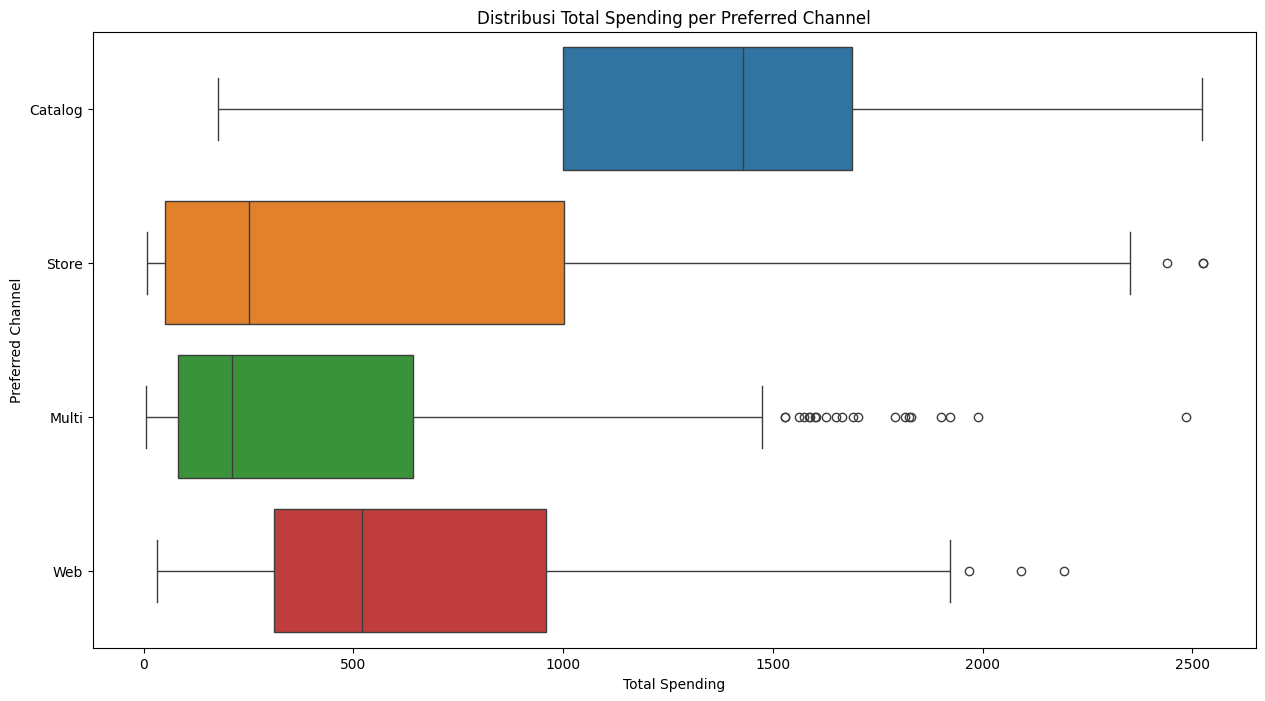

Tabel Deskriptif Total Spending per Preferred Channel


,count,mean,std,min,25%,50%,75%,max
PreferredChannel,,,,,,,,
Catalog,136.0,1345.330882,496.554082,178.0,999.0,1428.0,1689.0,2524.0
Multi,299.0,458.896321,519.538656,5.0,80.5,211.0,642.0,2486.0
Store,1477.0,554.388626,602.860515,8.0,50.0,252.0,1001.0,2525.0
Web,323.0,664.662539,482.704538,32.0,310.0,521.0,958.5,2194.0


In [180]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean,
            x = 'TotalProductSpend',
            y = 'PreferredChannel',
            hue = 'PreferredChannel')
plt.title('Distribusi Total Spending per Preferred Channel')
plt.xlabel('Total Spending')
plt.ylabel('Preferred Channel')
plt.show()

print('Tabel Deskriptif Total Spending per Preferred Channel')
display(df_clean.groupby('PreferredChannel')['TotalProductSpend'].describe())

In [181]:
df_clean['TotalProductSpend'].describe()['75%']

np.float64(1044.5)

Proporsi High Spending (%) per Preferred Channel:


,PreferredChannel,High Spending,Total Spending,Proporsi
0,Catalog,151431,182965,82.765010
1,Multi,73913,137210,53.868523
2,Store,505730,818832,61.762364
3,Web,102252,214686,47.628630


Proporsi High Spending (%) per Preferred Channel (Counts):


,PreferredChannel,High Spending (Counts),Total Spending (Counts),Proporsi (Counts)
0,Catalog,94,136,69.117647
1,Multi,51,299,17.056856
2,Store,342,1477,23.155044
3,Web,72,323,22.291022


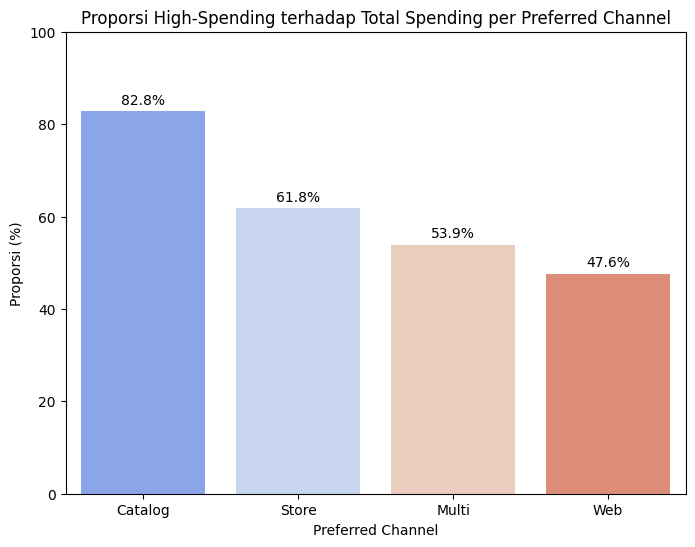

In [182]:
threshold = df_clean['TotalProductSpend'].describe()['75%']
high_activity = df_clean[df_clean['TotalProductSpend'] >= threshold]
high_ha = high_activity.groupby('PreferredChannel')['TotalProductSpend'].sum()
total_ha = df_clean.groupby('PreferredChannel')['TotalProductSpend'].sum()
proporsi_ha = high_ha / total_ha * 100

summary_spend = pd.DataFrame({
    "High Spending": high_ha,
    "Total Spending": total_ha,
    "Proporsi": proporsi_ha
}).reset_index().rename(columns={"index": "Preferred Channel"})

high_ha_c = high_activity.groupby('PreferredChannel')['ID'].nunique()
total_ha_c = df_clean.groupby('PreferredChannel')['ID'].nunique()
proporsi_ha_c = high_ha_c / total_ha_c * 100

summary_counts = pd.DataFrame({
    "High Spending (Counts)": high_ha_c,
    "Total Spending (Counts)": total_ha_c,
    "Proporsi (Counts)": proporsi_ha_c
}).reset_index().rename(columns={"Preferred Channel": "Preferred Channel"})

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=summary_spend.sort_values("Proporsi", ascending=False),
    x="PreferredChannel",
    y="Proporsi",
    palette='coolwarm'
)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{bar.get_height():.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')


plt.title("Proporsi High-Spending terhadap Total Spending per Preferred Channel")
plt.ylabel("Proporsi (%)")
plt.xlabel("Preferred Channel")
plt.ylim(0, 100)

print("Proporsi High Spending (%) per Preferred Channel:")
display(summary_spend)
print("Proporsi High Spending (%) per Preferred Channel (Counts):")
display(summary_counts)
plt.show()

Hasil Analisa `Efektivitas Channel` terhadap `Purchase` & `Total Spending`
- **Segmentasi Channel:**
Terdapat tiga channel utama yaitu `Web`, `Catalog`, dan `Store`, serta tambahan kategori Preferred Channel yang meliputi `Catalog`, `Store`, `Web`, dan `Multi`.

- **Uji Hipotesis (Kruskal-Wallis Test):**
P-value = 0.00 berhasil menolak Ho, sehingga terdapat perbedaan signifikan rata-rata total purchase antar channel. Artinya, distribusi aktivitas belanja berbeda secara signifikan antar channel.

- **Statistik Deskriptif Total Purchase per Channel:**
Rata-rata purchase tertinggi dimiliki oleh `Store` (**5.79**), diikuti `Web` (**4.08**), dan `Catalog` (**2.65**). Namun berdasarkan preferred channel, Catalog memiliki rata-rata tertinggi (**18.31**), diikuti Web (**14.75**), Store (**11.78**), dan Multi (**11.22**).

- **High Activity Users (Purchase):**
Proporsi pengguna dengan aktivitas tinggi paling besar terdapat pada `Catalog` (**73.12%**), diikuti `Web` (**52.68%**) dan `Store` (**51.19%**). Pada preferred channel, `Catalog` juga mendominasi dengan **58.82%** dibanding `Web` (**32.19%**), `Store` (**28.70%**), dan `Multi` (**17.06%**).

- **Statistik Deskriptif Total Spending per Preferred Channel:**
`Catalog` menunjukkan rata-rata total spending paling tinggi (**1345**), diikuti `Web` (**664**), `Store` (**554**), dan `Multi` (**459**). Median spending `Catalog` juga jauh lebih tinggi (**1428**) dibanding channel lain, menegaskan perbedaan distribusi belanja yang signifikan.

- **High Spending (Preferred Channel):**
Proporsi high spending paling tinggi dimiliki `Catalog` (**82.77%**), jauh di atas `Store` (**61.76%**), `Multi` (**53.87%**), dan `Web` (**47.63%**). Hal ini konsisten dengan pola yang sudah terlihat pada sisi purchase.


**Insight:**
Analisa ini menunjukkan bahwa meskipun `Store` menjadi channel dengan frekuensi transaksi paling tinggi, `Catalog` justru mendominasi baik dari sisi rata-rata maupun median spending, serta memiliki proporsi pelanggan high-spending yang sangat besar (**>80%**). Dengan kata lain, `Store` berfungsi sebagai channel volume dengan jumlah transaksi besar, sementara `Catalog` berperan sebagai channel premium yang dihuni customer berintensitas tinggi dan menghasilkan kontribusi belanja yang lebih bernilai.

Perusahaan dapat mengoptimalkan strategi pemasaran dengan memposisikan `Store` sebagai penggerak traffic dan perolehan pelanggan baru, sementara `Catalog` dimanfaatkan sebagai channel strategis untuk mengembangkan high-value segment dan memaksimalkan spending per customer.

#### **Summary**

1. Segmentasi Income & Spending Ratio
    - `Income`: Terdapat **216** customer dengan High Income, **1,287** Medium Income, dan **732** Low Income. Spending meningkat seiring income, dengan High Income rata-rata **1,516**, Low Income rata-rata **94**.
    - `Spending Ratio`: High Income hanya mengalokasikan sebagian kecil income (**0.0176**), sedangkan Low Income rata-rata **0.0045**, namun terdapat outlier hingga **0.707**.
    - `Uji Hipotesis:` Kruskal-Wallis menghasilkan p-value = 0.00 --> terdapat perbedaan signifikan spending ratio antar segmen income.
    - `Kelompok Spesial`: Ditemukan **184** High-Income Low-Spender dan **185** Low-Income High-Spender, menyimpang dari pola umum.

2. Efek Family Type terhadap Spending
    - `Family Type`: Mayoritas customer Small Family (**1,546**), disusul No Kid (**636**), dan Large Family (**53**).
    - `Total Spending`: No Kid tertinggi (**1,105.7**, median **1,189.5**), Small Family menengah (**411.3**, median **208**), Large Family terendah (**274.6**, median **88**).
    - `Uji Hipotesis`: Kruskal-Wallis p-value = 0.00 --> terdapat perbedaan signifikan spending antar Family Type.
    - `Customer Spesial`: Terdapat High Spender pada Small Family (**31** customer) dan Large Family (**6** customer), jauh di atas median segmennya.

3. Efektivitas Channel
    - `Purchase`: Rata-rata tertinggi ada di Store (***5.79***) --> channel volume, sedangkan Catalog (**2.65**) meski rendah transaksi, unggul di spending.
    - `Preferred Channel`: Catalog mendominasi spending (mean **1,345**, median **1,428**) dan high spender (**82.77%**) dibanding Store (**61.76%**), Multi (**53.87%**), dan Web (**47.63%**).
    - `Uji Hipotesis`: Kruskal-Wallis p-value = 0.00 --> terdapat perbedaan signifikan transaksi antar channel.
    - `Polarisasi Channel`: Store efektif untuk akuisisi volume transaksi, Catalog menjadi channel premium dengan spending dan loyalitas tertinggi.


**Insights:**
- `Income & Spending Ratio`: Income tetap menjadi driver utama spending, namun identifikasi High-Income Low-Spender membuka peluang upselling/premium marketing, sementara Low-Income High-Spender cocok untuk program diskon, loyalty, atau reward karena kontribusi spending relatif tinggi.
- `Family Type`: No Kid terbukti sebagai segmen dengan spending tertinggi. Meski Small & Large Family cenderung rendah, adanya kelompok High Spender di dalamnya dapat dimanfaatkan dengan strategi personalisasi, paket hemat, atau program loyalitas khusus keluarga.
- `Channel`: Catalog terbukti sebagai channel paling bernilai, meski Store mendominasi transaksi. Perusahaan dapat menempatkan Store sebagai sarana traffic builder, sementara Catalog sebagai penggerak high-value spending → strategi omnichannel menjadi kunci peningkatan revenue.

## **Kesimpulan dan Rekomendasi**

**Kesimpulan**
Analisis mendalam terhadap faktor-faktor yang memengaruhi customer spending di Supermarket menunjukkan beberapa temuan penting:
1. `Income & Spending Ratio`
    Income berperan besar dalam menentukan total spending, namun terdapat kelompok customer spesial: High-Income Low-Spender (184 customer) dan Low-Income High-Spender (185 customer). Kedua kelompok ini menyimpang dari pola umum dan menjadi target strategis untuk pengembangan bisnis.
2. `Family Type`
    Customer No Kid memiliki rata-rata spending paling tinggi, sedangkan Small Family dan Large Family cenderung rendah. Namun, ditemui kelompok High Spender di kedua segmen ini yang potensial sebagai target personalisasi.
3. `Efektivitas Channel`
    Store mendominasi dari sisi volume transaksi, namun Catalog terbukti sebagai channel premium dengan spending dan proporsi high spender tertinggi. Perbedaan signifikan antar channel menegaskan pentingnya strategi channel-specific.

Secara keseluruhan, spending customer dipengaruhi oleh kombinasi faktor demografis (income, family type) dan channel preference. Pendekatan generik tidak cukup, perusahaan perlu strategi segmentasi yang tajam untuk memaksimalkan potensi revenue.


**Rekomendasi**
1. **Optimalisasi Segmen Income**
    - Untuk High-Income Low-Spender: terapkan strategi upselling & premium marketing seperti produk eksklusif, bundling high-end, atau personalisasi promosi.
    - Untuk Low-Income High-Spender: berikan program loyalitas, diskon, atau reward berbasis frekuensi pembelian, agar kontribusi spending tetap terjaga tanpa membebani daya beli mereka.
2. **Strategi Family Type**
    - Fokus pada No Kid sebagai segmen utama dengan spending tinggi --> tawarkan program eksklusif & produk premium.
    - Untuk Small & Large Family: gunakan paket hemat keluarga, diskon volume, dan loyalty program agar spending lebih optimal. Targetkan khusus kelompok High Spender di dalamnya dengan personalisasi promosi.
3. **Channel Management & Omnichannel Strategy**
    - Store: posisikan sebagai channel utama untuk akuisisi pelanggan dan traffic, manfaatkan promosi massal & program awareness.
    - Catalog: jadikan sebagai channel premium --> fokus pada high-value customers dengan promosi eksklusif, voucher personalisasi, atau early access produk baru.
    - Web: tingkatkan engagement dengan integrasi digital, promo berbasis data browsing, dan kemudahan transaksi online.
    - Implementasikan strategi omnichannel untuk mendorong cross-channel spending, misalnya: belanja di Store mendapat voucher tambahan untuk Catalog/Web.
4. Customer Profiling & Personalization
    Gunakan data spending, family type, dan channel preference untuk membuat customer persona. Terapkan kampanye berbasis segmentasi agar promosi lebih efektif, relevan, dan meningkatkan loyalitas jangka panjang.

In [183]:
df_clean.to_csv("Supermarket_Customer_Clean.csv", index=False)